<strong> What is a Time Series? </strong>


Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

Why even analyze a time series?

Because it is the preparatory step before you develop a forecast of the series.

Besides, time series forecasting has enormous commercial significance because stuff that is important to a business like demand and sales, number of visitors to a website, stock price etc are essentially time series data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_pacf
from autots import AutoTS

<strong> How to import time series in python? </strong>

So how to import time series data?

The data for a time series typically stores in .csv files or other spreadsheet formats and contains two columns: the date and the measured value. 
Lets use the read_csv() in pandas package to read the time series dataset (a csv file on Australian Drug Sales) as a pandas dataframe. 
Adding the parse_dates=['Date'] argument will make the date column to be parsed as a date field.

In [2]:
df = pd.read_csv("stock_data/RELIANCE.csv",usecols=['Date','Close'],parse_dates=['Date')

In [3]:
df.head(10)

Date      Close
0 1996-01-01  15.917452
1 1996-01-02  15.793671
2 1996-01-03  15.913584
3 1996-01-04  15.766594
4 1996-01-05  15.658285
5 1996-01-08  15.031645
6 1996-01-09  14.598411
7 1996-01-10  14.223200
8 1996-01-11  14.668038
9 1996-01-12  14.513312

In [4]:
df.tail(10)

Date        Close
6937 2023-07-24  2487.399902
6938 2023-07-25  2485.800049
6939 2023-07-26  2526.199951
6940 2023-07-27  2502.699951
6941 2023-07-28  2527.850098
6942 2023-07-31  2549.250000
6943 2023-08-01  2513.199951
6944 2023-08-02  2486.350098
6945 2023-08-03  2475.899902
6946 2023-08-04  2509.550049

In [5]:
df = df.dropna()

<strong> Visualizing a time series </strong>

Let’s use matplotlib to visualise the series.

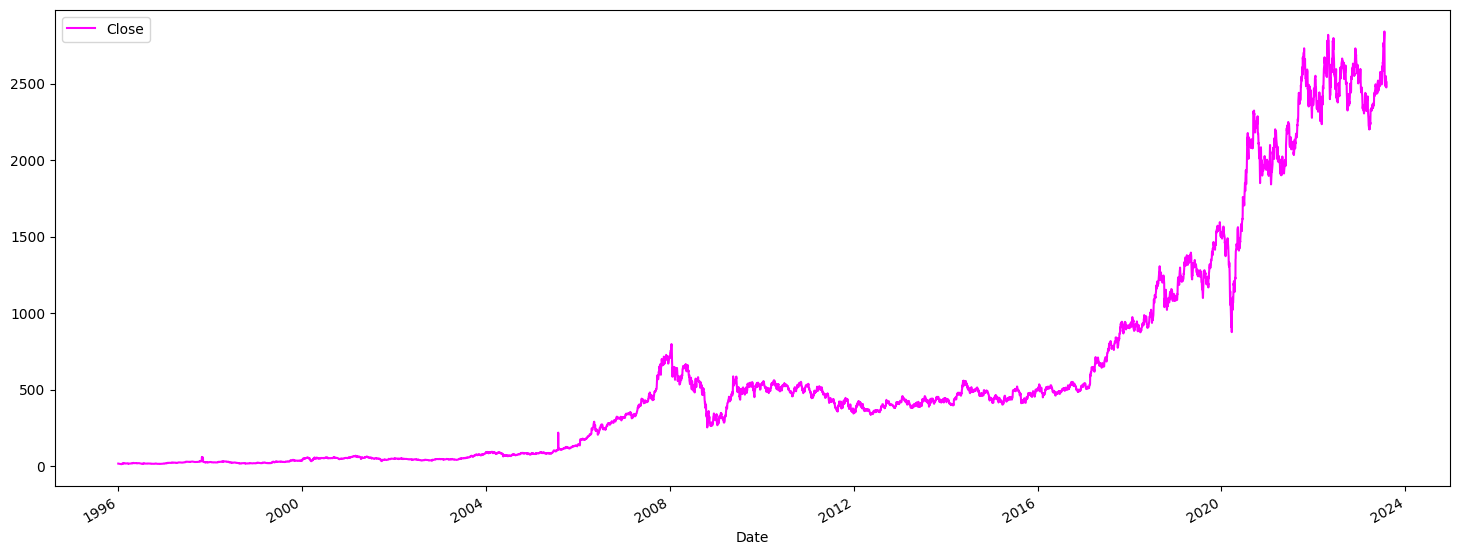

In [6]:
rcParams['figure.figsize'] = 18, 7
df.plot('Date', 'Close',c='magenta')
plt.show()

In [7]:
x = df['Date'].values
y1 = df['Close'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20,5), dpi= 1200)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Reliance Stock Analysis from 1996-2023', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.show()

Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

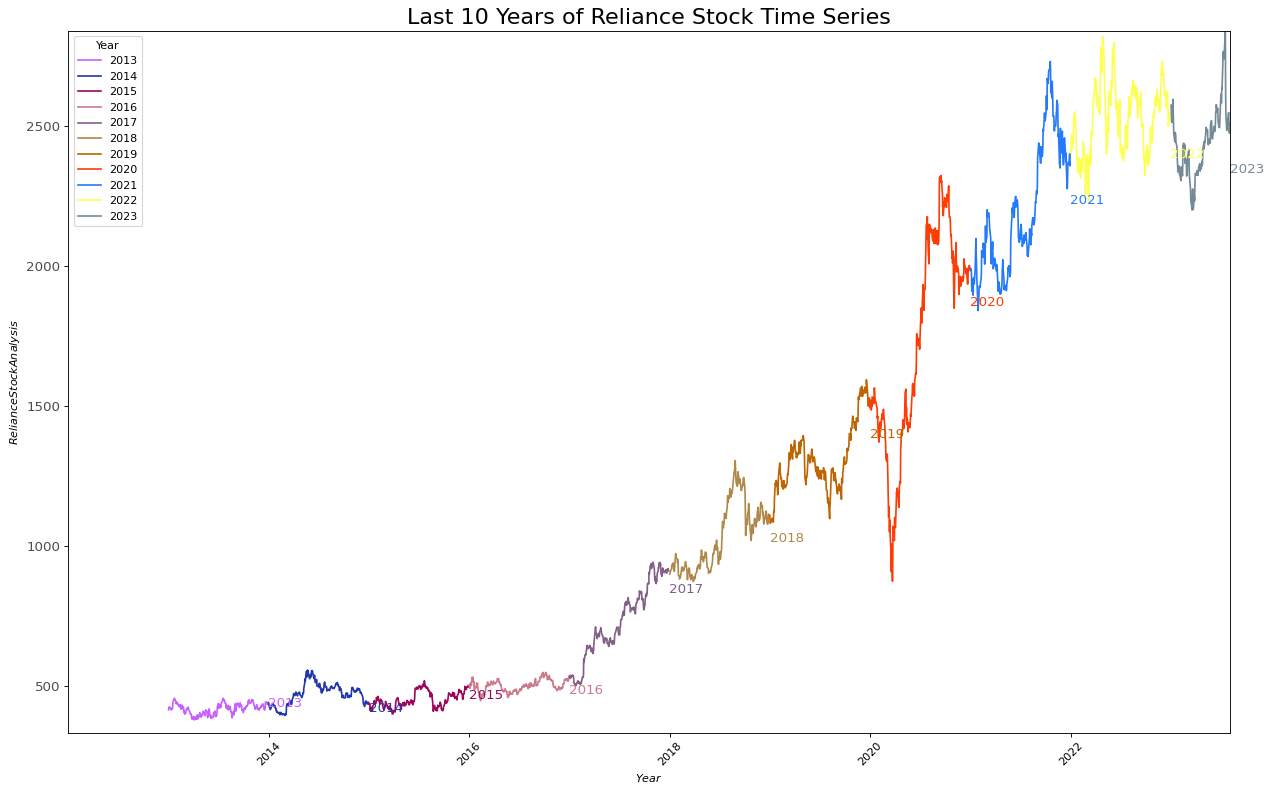

In [32]:
# Import Data
df = pd.read_csv('stock_data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Filter data for the last 10 years
current_year = df['Date'].max().year
last_10_years = current_year - 11
filtered_df = df[df['Date'].dt.year >= last_10_years].copy()  # Make a copy of the DataFrame

# Prepare data
years = filtered_df['Date'].dt.year.unique()

# Convert 'Close' values to numeric
filtered_df['Close'] = pd.to_numeric(filtered_df['Close'], errors='coerce')

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16, 10), dpi=80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('Date', 'Close', data=filtered_df.loc[filtered_df['Date'].dt.year==y, :], color=mycolors[i], label=y)
        
        # Adjust the y-position of the year label
        offset = i * 16
        plt.text(filtered_df.loc[filtered_df['Date'].dt.year==y, 'Date'][-1:].values[0], filtered_df.loc[filtered_df['Date'].dt.year==y, 'Close'][-1:].values[0] - offset, y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(filtered_df['Date'].min(), filtered_df['Date'].max()), ylim=(filtered_df['Close'].min(), filtered_df['Close'].max()), ylabel='$ Reliance Stock Analysis $', xlabel='$Year$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Last 10 Years of Reliance Stock Time Series", fontsize=20)
plt.legend(title='Year', loc='upper left')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()  # Ensures proper spacing of labels and plot elements
plt.show()

Since its a monthly time series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

Seasonal Plot of a Time Series for past 10 years (2013 - 2023)

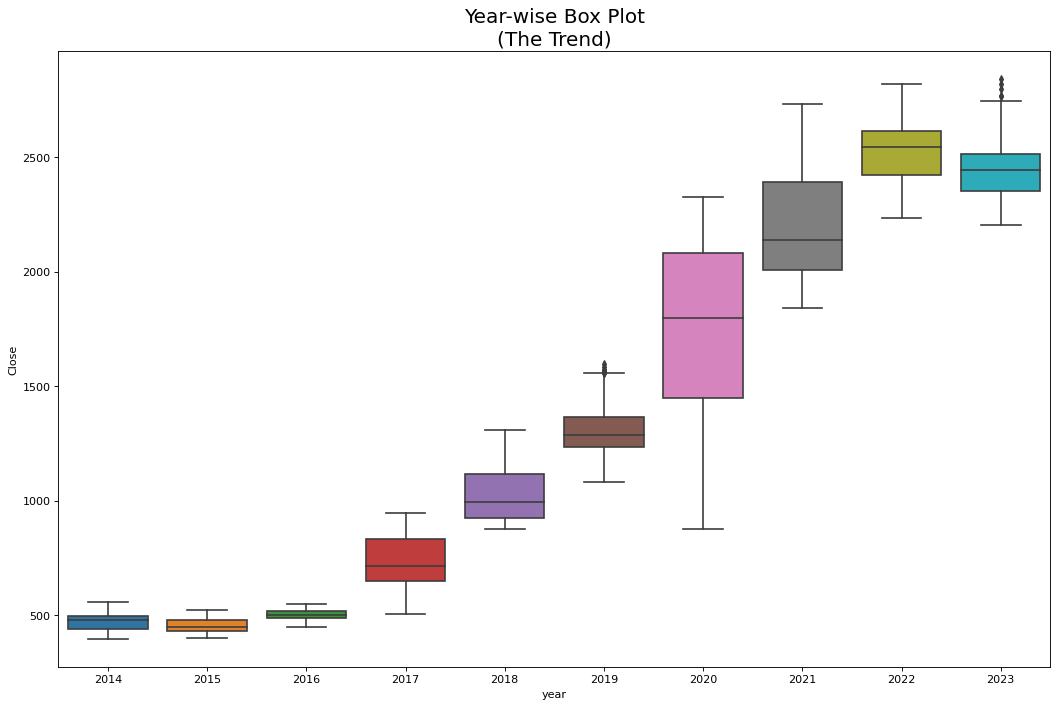

In [9]:
df = pd.read_csv('stock_data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Filter data for the last 10 years
current_year = df['Date'].max().year
last_10_years = current_year - 9
filtered_df = df[df['Date'].dt.year >= last_10_years].copy()  # Make a copy of the DataFrame

# Prepare data
filtered_df['year'] = [d.year for d in filtered_df['Date']]
years = filtered_df['year'].unique()

# Draw Plot
plt.figure(figsize=(16, 10), dpi=80)
sns.boxplot(x='year', y='Close', data=filtered_df)

# Set Title
plt.title('Year-wise Box Plot\n(The Trend)', fontsize=18)
plt.show()


Boxplot of Year-wise (trend) Distribution

You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

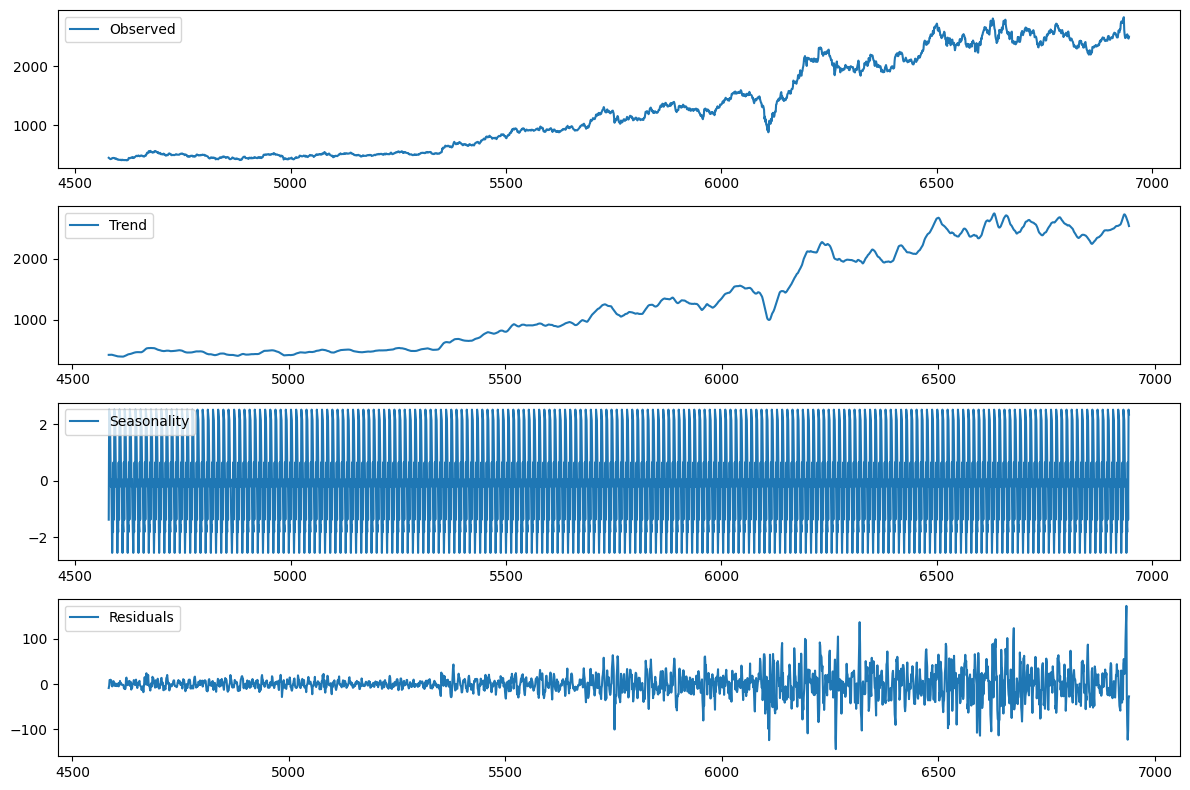

In [10]:

df = pd.read_csv('stock_data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Filter data for the last 10 years
current_year = df['Date'].max().year
last_10_years = current_year - 9
filtered_df = df[df['Date'].dt.year >= last_10_years].copy()  # Make a copy of the DataFrame

# Convert 'Close' values to numeric (handling missing values)
filtered_df['Close'] = pd.to_numeric(filtered_df['Close'], errors='coerce')

# Drop rows with missing 'Close' values
filtered_df.dropna(subset=['Close'], inplace=True)

# Prepare data
filtered_df['year'] = [d.year for d in filtered_df['Date']]
years = filtered_df['year'].unique()

# Perform seasonal decomposition
result = seasonal_decompose(filtered_df['Close'], model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Patterns in a time series
Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

In [11]:
df = pd.read_csv('stock_data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Drop rows with missing 'Close' values
df.dropna(subset=['Close'], inplace=True)

# ADF Test
result_adf = adfuller(df.Close.values, autolag='AIC')
print('ADF Test:')
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
for key, value in result_adf[4].items():
    print(f'Critial Values - {key}: {value}')

# KPSS Test
result_kpss = kpss(df.Close.values, regression='c')
print('\nKPSS Test:')
print(f'KPSS Statistic: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')
for key, value in result_kpss[3].items():
    print(f'Critial Values - {key}: {value}')

ADF Test:
ADF Statistic: 0.9780552495765302
p-value: 0.9940289239319254
Critial Values - 1%: -3.4312978026247642
Critial Values - 5%: -2.861958851678628
Critial Values - 10%: -2.5669929508814087

KPSS Test:
KPSS Statistic: 9.078381889183484
p-value: 0.01
Critial Values - 10%: 0.347
Critial Values - 5%: 0.463
Critial Values - 2.5%: 0.574
Critial Values - 1%: 0.739


/tmp/ipykernel_100959/2163005327.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df.Close.values, regression='c')


<strong> How to test for stationarity? </strong>


The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)
Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
Philips Perron test (PP Test)
The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

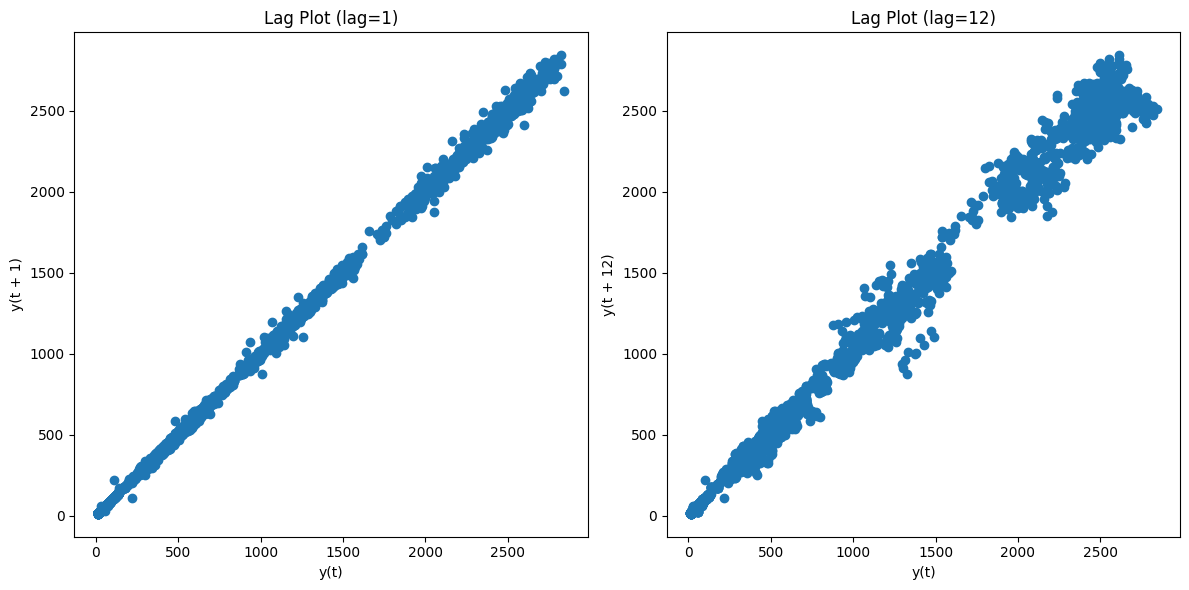

In [12]:
df = pd.read_csv('stock_data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Drop rows with missing 'Close' values
df.dropna(subset=['Close'], inplace=True)

# Create Lag Plots
plt.figure(figsize=(12, 6))

# Lag plot with lag=1
plt.subplot(1, 2, 1)
lag_plot(df['Close'], lag=1)
plt.title('Lag Plot (lag=1)')

# Lag plot with lag=12 (e.g., for monthly data)
plt.subplot(1, 2, 2)
lag_plot(df['Close'], lag=12)
plt.title('Lag Plot (lag=12)')

plt.tight_layout()
plt.show()

A lag plot is a graphical tool used to help identify patterns or structures in time series data. It involves plotting each data point against the data point that comes after it with a certain lag. This can help visualize relationships between consecutive observations and detect any potential autocorrelation or patterns.

Given that you have loaded a time series dataset from a CSV file and stored it in the DataFrame df, you can create a lag plot using the pandas plotting functionality. Here's how you can do it:

In this code, the lag_plot function from pandas is used to create the lag plot. It takes the 'Close' column from the DataFrame as input and plots each data point against the data point that follows it.

Interpretation of the Lag Plot:

If the points in the lag plot are scattered randomly and there is no apparent pattern, it suggests that the time series might be random or not significantly autocorrelated.
If the points in the lag plot form a linear pattern, it indicates strong positive autocorrelation.
If the points in the lag plot are clustered around a specific shape (e.g., curved line, sine wave), it indicates a specific type of pattern in the data.
Keep in mind that the interpretation of a lag plot depends on the shape of the plot and the characteristics of your specific dataset. It can provide insights into the nature of autocorrelation and potential patterns in your time series data.

<Figure size 1000x600 with 0 Axes>

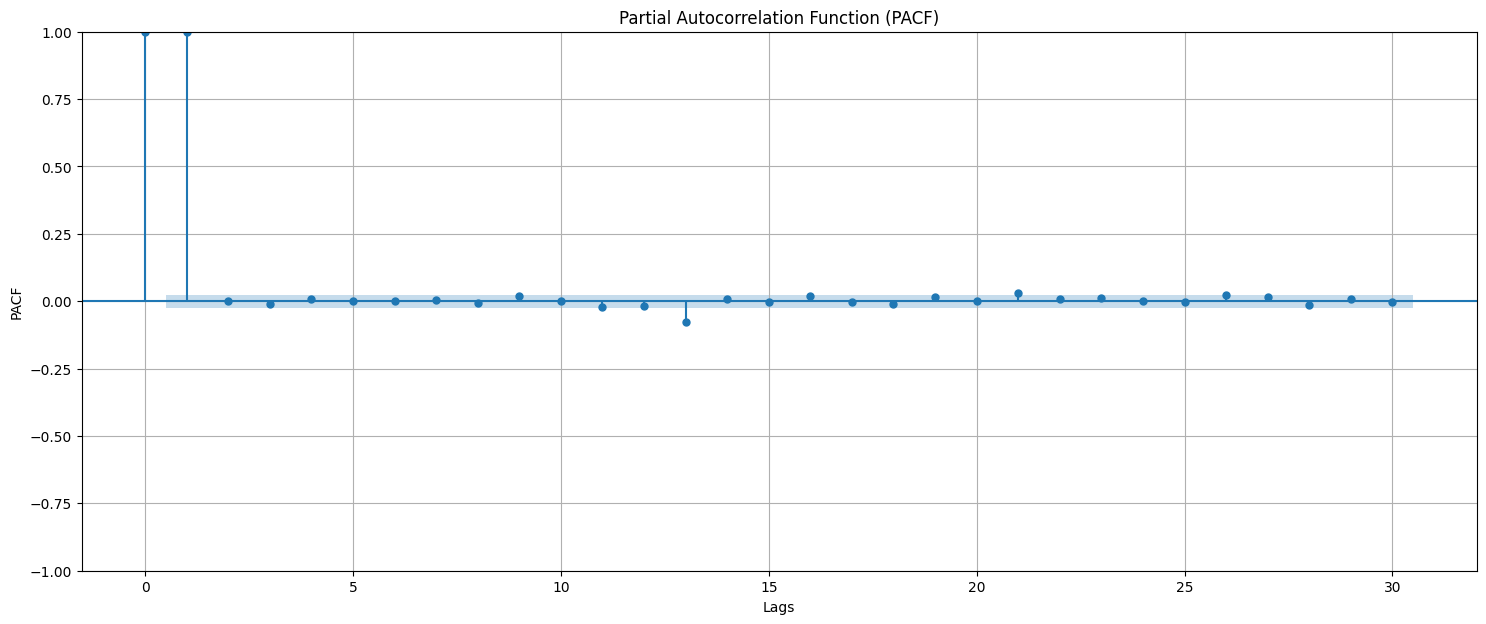

In [13]:
df = pd.read_csv('stock_data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')
df.reset_index(inplace=True)

# Drop rows with missing 'Close' values
df.dropna(subset=['Close'], inplace=True)

# Create PACF Plot
plt.figure(figsize=(10, 6))

# Plot PACF with lags up to 30
plot_pacf(df['Close'], lags=30, alpha=0.05)

plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

The Partial Autocorrelation Function (PACF) is a statistical tool used in time series analysis to determine the direct relationship between an observation and its lagged values while accounting for the indirect relationships through intermediate lags. It helps identify the order of an autoregressive (AR) model for a time series.

In this example, the plot_pacf function from statsmodels is used to plot the PACF of the 'Close' price time series. The lags parameter specifies the number of lags to include in the plot.

If the PACF values decrease gradually and do not abruptly cut off, it suggests a moving average (MA) component might also be present in the model.
Remember that interpreting the PACF plot can be complex, and it's just one tool among many for time series analysis. You should consider other techniques, such as analyzing the autocorrelation function (ACF) and trying different model orders, to make informed decisions about the appropriate model for your time series data.

In [14]:
mod = AutoTS(forecast_length=3, frequency='infer',  ensemble='simple', drop_data_older_than_periods=200 )

<strong> What is Auto-TS? </strong>

It is an open-source python library basically used to automate Time Series Forecasting. It will automatically train multiple time series models using a single line of code, which will help us to choose the best one for our problem statement.

In the python open-source library Auto-TS, auto-ts.Auto_TimeSeries() is the main function that you will call with your train data. We can then choose what kind of models you want such as stats, ml, or FB prophet-based models. We can also tune the parameters which will automatically select the best model based on the scoring parameter we want it to be based on. It will return the best model and a dictionary containing predictions for the number of forecast_periods you mentioned (default=2).

Features of Auto-TS library :
It finds the optimal time series forecasting model using genetic programming optimization.
It trains naive, statistical, machine learning, and deep learning models, with all possible hyperparameter configurations, and cross-validation.
It performs data transformations to handle messy data by learning optimal NaN imputation and outlier removal.
Choice of the combination of metrics for model selection.

In [15]:
mod = mod.fit(df, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83703D+00    |proj g|=  1.08857D-01


 This problem is unconstrained.



At iterate    1    f=  4.82421D+00    |proj g|=  3.63510D-02

At iterate    2    f=  4.82270D+00    |proj g|=  1.85980D-02

At iterate    3    f=  4.82209D+00    |proj g|=  1.00947D-02

At iterate    4    f=  4.82181D+00    |proj g|=  9.40034D-03

At iterate    5    f=  4.82163D+00    |proj g|=  7.46486D-03

At iterate    6    f=  4.82146D+00    |proj g|=  7.64181D-03

At iterate    7    f=  4.82091D+00    |proj g|=  1.03093D-02

At iterate    8    f=  4.82028D+00    |proj g|=  1.77992D-02

At iterate    9    f=  4.81988D+00    |proj g|=  1.90188D-02

At iterate   10    f=  4.81937D+00    |proj g|=  9.95514D-03

At iterate   11    f=  4.81923D+00    |proj g|=  5.04756D-03

At iterate   12    f=  4.81914D+00    |proj g|=  4.19395D-03

At iterate   13    f=  4.81906D+00    |proj g|=  7.85903D-03

At iterate   14    f=  4.81896D+00    |proj g|=  6.28291D-03

At iterate   15    f=  4.81869D+00    |proj g|=  1.12389D-02

At iterate   16    f=  4.81862D+00    |proj g|=  9.48133D-03

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 8 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model ETS in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 12 with model GLM in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GLS in generation 0 of 10
Model Number: 15 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 15 in generation 0: GluonTS
Model Number: 16 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 16 in generation 0: GluonTS
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 17 in generation 0: GluonTS
Model Number: 18 with model GluonTS in generation 0 of 10
Template Eval Error: ImportErr

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 36 in generation 0: FBProphet
Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 w

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Template Eval Error: ValueError('Only gave one variable to VECM') in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 74 in generation 0: ARIMA
Model Number: 75 with model WindowRegression in generation 0 of 10
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76 in generation 0: DatepartRegression
Model Number: 77 with model UnivariateRegression in generation 0 of 10
Model Number: 78 with model MultivariateRegression in generation 0 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 94 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 94 in generation 0: GluonTS
Model Number: 95 with model GLS in generation 0 of 10
Model Number: 96 with model SeasonalNaive in generation 0 of 10
Model Number: 97 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.28045D-01    |proj g|=  2.31070D+00

At iterate    1    f= -7.36451D-01    |proj g|=  1.29705D+00

At iterate    2    f= -7.43716D-01    |proj g|=  5.01466D-01

At iterate    3    f= -7.47886D-01    |proj g|=  2.98855D-01

At iterate    4    f= -7.52866D-01    |proj g|=  6.81072D-01

At iterate    5    f= -7.78105D-01    |proj g|=  2.18732D+00

At iterate    6    f= -7.98958D-01  

 This problem is unconstrained.



At iterate    8    f= -8.16605D-01    |proj g|=  8.13071D-02

At iterate    9    f= -8.17184D-01    |proj g|=  1.18430D-01

At iterate   10    f= -8.18133D-01    |proj g|=  2.47271D-01

At iterate   11    f= -8.19475D-01    |proj g|=  2.74571D-01

At iterate   12    f= -8.21170D-01    |proj g|=  7.80805D-02

At iterate   13    f= -8.21466D-01    |proj g|=  1.23240D-02

At iterate   14    f= -8.21509D-01    |proj g|=  1.18850D-02

At iterate   15    f= -8.21611D-01    |proj g|=  3.38695D-02

At iterate   16    f= -8.21632D-01    |proj g|=  2.24144D-01

At iterate   17    f= -8.21762D-01    |proj g|=  1.01603D-01

At iterate   18    f= -8.21866D-01    |proj g|=  1.20982D-02

At iterate   19    f= -8.21919D-01    |proj g|=  1.84296D-02

At iterate   20    f= -8.21970D-01    |proj g|=  1.62453D-02

At iterate   21    f= -8.22077D-01    |proj g|=  3.45809D-02

At iterate   22    f= -8.22518D-01    |proj g|=  3.21174D-02

At iterate   23    f= -8.23065D-01    |proj g|=  5.33685D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 106 with model AverageValueNaive in generation 0 of 10
Model Number: 107 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model ARIMA in generation 0 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58997D+00    |proj g|=  1.96510D-02

At iterate    1    f=  2.58950D+00    |proj g|=  1.56704D-02

At iterate    2    f=  2.58910D+00    |proj g|=  1.09885D-02

At iterate    3    f=  2.58868D+00    |proj g|=  6.02647D-03

At iterate    4    f=  2.58854D+00    |proj g|=  4.50132D-03

At iterate    5    f=  2.58849D+00    |proj g|=  4.52632D-03

At iterate    6    f=  2.58838D+00    |proj g|=  9.16688D-03

At iterate    7    f=  2.58809D+00    |proj g|=  2.02973D-02

At iterate    8    f=  2.58755D+00    |proj g|=  3.04915D-02

At iterate    9    f=  2.58619D+00    |proj g|=  3.49351D-02

At iterate   10    f=  2.58475D+00    |proj g|=  2.86125D-02

At iterate   11    f=  2.58400D+00    |proj g|=  9.39385D-03

At iterate   12    f=  2.58387D+00    |proj g|=  5.59984D-03

At iterate   13    f=  2.5

 This problem is unconstrained.



At iterate   17    f=  4.97421D+00    |proj g|=  1.98654D-05

At iterate   18    f=  4.97421D+00    |proj g|=  1.56880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     18     20      1     0     0   1.569D-05   4.974D+00
  F =   4.9742058628501100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 131 with model UnivariateMotif in generation 0 of 10
Model Number: 132 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 132 in generation 0: ARIMA
Model Number: 133 with model VAR in generation 

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 140 in generation 0: GLM
Model Number: 141 with model UnobservedComponents in generation 0 of 10
Model Number: 142 with model LastValueNaive in generation 0 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: Runt

Model Number: 143 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 143 in generation 0: FBProphet
Model Number: 144 with model LastValueNaive in generation 0 of 10
Model Number: 145 with model SeasonalNaive in generation 0 of 10
Model Number: 146 with model NVAR in generation 0 of 10
Model Number: 147 with model MultivariateRegression in generation 0 of 10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM inter

[LightGBM] [Fatal] [poisson]: at least one target label is negative


Model Number: 153 with model MetricMotif in generation 0 of 10
Model Number: 154 with model ConstantNaive in generation 0 of 10
Model Number: 155 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 155 in generation 0: DatepartRegression
Model Number: 156 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 156 in generation 0: ARDL
Model Number: 157 with model Theta in generation 0 of 10
Model Number: 158 with model GLS in generation 0 of 10
Model Number: 159 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 159 in generation 0: UnivariateRegression
Model Number: 160 with model ARDL in generation 0 of 10
Model Number: 161 with model GLS in generation 0 of 10
Template Eval Error: Exception('Transforme

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 169 with model MultivariateMotif in generation 0 of 10
Model Number: 170 with model Theta in generation 0 of 10
Model Number: 171 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 171 in generation 0: ARDL
Model Number: 172 with model DatepartRegression in generation 0 of 10
Model Number: 173 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 173 in generation 0: UnobservedComponents
Model Number: 174 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 174 in generation 0: UnobservedComponents
Model Number: 175 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 187 with model SeasonalNaive in generation 1 of 10
Model Number: 188 with model AverageValueNaive in generation 1 of 10
Model Number: 189 with model UnobservedComponents in generation 1 of 10
Model Number: 190 with model SectionalMotif in generation 1 of 10
Model Number: 191 with model NVAR in generation 1 of 10
Model Number: 192 with model UnobservedComponents in generation 1 of 10
Model Number: 193 with model UnobservedComponents in generation 1 of 10
Model Number: 194 with model Theta in generation 1 of 10
Model Number: 195 with model SeasonalNaive in generation 1 of 10
Model Number: 196 with model GLM in generation 1 of 10
Model Number: 197 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 197 in generation 1: Theta
Model Number: 198 with model UnobservedComponents in generation 1 of 10
Model Number: 199 with model LastValueNaive in generation 1 of 10
Model Number: 200 with model LastValueNaive in gener

 This problem is unconstrained.


Template Eval Error: Exception('Transformer Detrend failed on fit') in model 204 in generation 1: NVAR
Model Number: 205 with model SeasonalNaive in generation 1 of 10
Model Number: 206 with model GLS in generation 1 of 10
Model Number: 207 with model MultivariateRegression in generation 1 of 10
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 212 in generation 1: UnobservedComponents
Model Number: 213 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 213 in generation 1: LastValueNaive
Model Number: 214 with model ConstantNaive in generation 1 of 10
Model Number: 215 with model DatepartRegression in generation 1 of 10
Model Number: 216 with model WindowRegression in generation 1 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 217 with model ConstantNaive in generation 1 of 10
Model Number: 218 with model ARIMA in generation 1 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97758D-01    |proj g|=  6.24736D-01

At iterate    1    f= -3.45496D-01    |proj g|=  1.40774D+00

At iterate    2    f= -3.75804D-01    |proj g|=  2.48095D-01

At iterate    3    f= -3.77879D-01    |proj g|=  2.24264D-01

At iterate    4    f= -3.78635D-01    |proj g|=  1.03051D-01

At iterate    5    f= -3.79621D-01    |proj g|=  1.59507D-01

At iterate    6    f= -3.80843D-01    |proj g|=  2.97953D-01

At iterate    7    f= -3.83172D-01    |proj g|=  3.61432D-01

At iterate    8    f= -3.84889D-01    |proj g|=  1.84495D-01

At iterate    9    f= -3.85381D-01    |proj g|=  2.85568D-02

At iterate   10    f= -3.85618D-01    |proj g|=  8.92256D-02

At iterate   11    f= -3.85787D-01    |proj g|=  1.42653D-01

At iterate   12    f= -3.86179D-01    |proj g|=  1.99408D-01

At iterate   13    f= -3.8

 This problem is unconstrained.



At iterate   17    f=  7.20211D-01    |proj g|=  1.36170D-01

At iterate   18    f=  7.07124D-01    |proj g|=  1.58312D-01

At iterate   19    f=  6.97119D-01    |proj g|=  1.03916D-01

At iterate   20    f=  6.92129D-01    |proj g|=  2.30122D-01

At iterate   21    f=  6.85717D-01    |proj g|=  6.31943D-02

At iterate   22    f=  6.84533D-01    |proj g|=  3.28657D-02

At iterate   23    f=  6.83641D-01    |proj g|=  1.97585D-02

At iterate   24    f=  6.82957D-01    |proj g|=  1.96872D-02

At iterate   25    f=  6.82140D-01    |proj g|=  1.69952D-02

At iterate   26    f=  6.81473D-01    |proj g|=  8.54200D-03

At iterate   27    f=  6.80806D-01    |proj g|=  1.78998D-02

At iterate   28    f=  6.79623D-01    |proj g|=  2.95961D-02

At iterate   29    f=  6.78093D-01    |proj g|=  4.29641D-02

At iterate   30    f=  6.77706D-01    |proj g|=  3.12897D-02

At iterate   31    f=  6.76216D-01    |proj g|=  1.49876D-02

At iterate   32    f=  6.75799D-01    |proj g|=  8.08958D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 250 with model UnobservedComponents in generation 1 of 10
Model Number: 251 with model UnivariateMotif in generation 1 of 10
Model Number: 252 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 252 in generation 1: LastValueNaive
Model Number: 253 with model SeasonalNaive in generation 1 of 10
Model Number: 254 with model AverageValueNaive in generation 1 of 10
Model Number: 255 with model ETS in generation 1 of 10
Model Number: 256 with model SeasonalNaive in generation 1 of 10
Model Number: 257 with model ConstantNaive in generation 1 of 10
Model Number: 258 with model NVAR in generation 1 of 10
Model Number: 259 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 259 in generation 1: Theta
Model Number: 260 with model GLM in generation 1 of 10
Model Number: 261 with model GLM in generation 1 of 10
Model Number: 

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 265 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 265 in generation 1: AverageValueNaive
Model Number: 266 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 266 in generation 1: UnivariateMotif
Model Number: 267 with model AverageValueNaive in generation 1 of 10
Model Number: 268 with model GLS in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 268 in generation 1: GLS
Model Number: 269 with model WindowRegression in generation 1 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 269 in generation 1: WindowRegression
Model Number: 270 with model AverageValueNaive in generation 1 of 10
Model Number: 271 with model AverageValueNaive in generation 1 of 10
Model Number: 272 with model UnobservedComponents in generation 1 of 10
M

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 282 with model GLS in generation 1 of 10
Model Number: 283 with model SeasonalNaive in generation 1 of 10
Model Number: 284 with model MetricMotif in generation 1 of 10
Model Number: 285 with model UnivariateRegression in generation 1 of 10
Model Number: 286 with model AverageValueNaive in generation 1 of 10
Model Number: 287 with model GLS in generation 1 of 10
Model Number: 288 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 288 in generation 1: NVAR
Model Number: 289 with model ARIMA in generation 1 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92531D+00    |proj g|=  1.07486D+02

At iterate    1    f=  1.03795D+00    |proj g|=  8.52322D-01

At iterate    2    f=  1.67606D-01    |proj g|=  5.82012D-01

At iterate    3    f=  1.56640D-01    |proj g|=  9.18704D-01

At iterate    4    f= -1.90567D+00    |proj g|=  8.65494D+00

At iterate    5    f= -1.91610D+00    |proj g|=  5.97334D+00

At iterate    6    f= -1.95829D+00    |proj g|=  1.37637D+00

At iterate    7    f= -1.96562D+00    |proj g|=  8.23476D-01

At iterate    8    f= -2.06325D+00    |proj g|=  7.84250D-01

At iterate    9    f= -2.28495D+00    |proj g|=  1.51014D+01

At iterate   10    f= -2.66111D+00    |proj g|=  1.42459D+01

At iterate   11    f= -2.67195D+00    |proj g|=  2.36953D+00

At iterate   12    f= -2.67468D+00    |proj g|=  1.92644D+00

At iterate   13    f= -2.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 294 with model MultivariateRegression in generation 1 of 10
Model Number: 295 with model ConstantNaive in generation 1 of 10
Model Number: 296 with model Theta in generation 1 of 10
Model Number: 297 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 297 in generation 1: UnivariateMotif
Model Number: 298 with model AverageValueNaive in generation 1 of 10
Model Number: 299 with model ETS in generation 1 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 300 with model SeasonalNaive in generation 1 of 10
Model Number: 301 with model WindowRegression in generation 1 of 10
Model Number: 302 with model NVAR in generation 1 of 10
Model Number: 303 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 303 in generation 1: Theta

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76527D+00    |proj g|=  1.31697D+00

At iterate    1    f=  5.36673D+00    |proj g|=  2.88988D-01

At iterate    2    f=  5.32365D+00    |proj g|=  2.05331D-01

At iterate    3    f=  5.24803D+00    |proj g|=  1.92658D-01

At iterate    4    f=  5.23115D+00    |proj g|=  2.25642D-01

At iterate    5    f=  5.21245D+00    |proj g|=  1.22891D-01

At iterate    6    f=  5.20426D+00    |proj g|=  1.12813D-01

At iterate    7    f=  5.20284D+00    |proj g|=  1.93066D-02

At iterate    8    f=  5.20261D+00    |proj g|=  1.87911D-02

At iterate    9    f=  5.20216D+00    |proj g|=  1.56431D-02

At iterate   10    f=  5.20043D+00    |proj g|=  6.66935D-02

At iterate   11    f=  5.20002D+00    |proj g|=  7.38686D-02

At iterate   12    f=  5.19837D+00    |proj g|=  6.37900D-02

At iterate   13    f=  5.1

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 325 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 326 with model ConstantNaive in generation 2 of 10
Model Number: 327 with model UnobservedComponents in generation 2 of 10
Model Number: 328 with model UnivariateMotif in generation 2 of 10
Model Number: 329 with model GLM in generation 2 of 10
Model Number: 330 with model UnobservedComponents in generation 2 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 330 in generation 2: UnobservedComponents
Model Number: 331 with model SectionalMotif in generation 2 of 10
Model Number: 332 with model MetricMotif in generation 2 of 10
Model Number: 333 with model SeasonalNaive in generation 2 of 10
Model Number: 334 with model MultivariateRegression in generation 2 of 10
Model 

 This problem is unconstrained.


Model Number: 351 with model MultivariateRegression in generation 2 of 10
Model Number: 352 with model ConstantNaive in generation 2 of 10
Model Number: 353 with model MultivariateRegression in generation 2 of 10
Model Number: 354 with model Theta in generation 2 of 10
Model Number: 355 with model ETS in generation 2 of 10
Model Number: 356 with model Theta in generation 2 of 10
Model Number: 357 with model MultivariateRegression in generation 2 of 10
Model Number: 358 with model Theta in generation 2 of 10
Model Number: 359 with model ETS in generation 2 of 10
Model Number: 360 with model UnivariateRegression in generation 2 of 10
Model Number: 361 with model UnobservedComponents in generation 2 of 10
Model Number: 362 with model ARIMA in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 362 in generation 2: ARIMA
Model Number: 363 with model NVAR in generation 2 of 10
Model Number: 364 with model AverageValueNaive 

 This problem is unconstrained.



At iterate   23    f= -1.99812D-01    |proj g|=  3.16333D-03

At iterate   24    f= -1.99881D-01    |proj g|=  3.56471D-03

At iterate   25    f= -1.99900D-01    |proj g|=  1.27994D-03

At iterate   26    f= -1.99902D-01    |proj g|=  3.46779D-03

At iterate   27    f= -1.99903D-01    |proj g|=  1.77986D-03

At iterate   28    f= -1.99903D-01    |proj g|=  5.85326D-04

At iterate   29    f= -1.99903D-01    |proj g|=  5.89254D-04

At iterate   30    f= -1.99903D-01    |proj g|=  1.03053D-03

At iterate   31    f= -1.99903D-01    |proj g|=  4.25532D-04

At iterate   32    f= -1.99903D-01    |proj g|=  5.60886D-04

At iterate   33    f= -1.99904D-01    |proj g|=  3.65766D-04

At iterate   34    f= -1.99904D-01    |proj g|=  5.75951D-04

At iterate   35    f= -1.99904D-01    |proj g|=  9.51240D-04

At iterate   36    f= -1.99904D-01    |proj g|=  3.82528D-04

At iterate   37    f= -1.99904D-01    |proj g|=  4.52626D-04

At iterate   38    f= -1.99904D-01    |proj g|=  3.49712D-04

At iter

 This problem is unconstrained.


Model Number: 378 with model AverageValueNaive in generation 2 of 10
Model Number: 379 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 379 in generation 2: ConstantNaive
Model Number: 380 with model GLM in generation 2 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 380 in generation 2: GLM
Model Number: 381 with model GLS in generation 2 of 10
Model Number: 382 with model LastValueNaive in generation 2 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value enc

Model Number: 383 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 383 in generation 2: WindowRegression
Model Number: 384 with model ETS in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 384 in generation 2: ETS
Model Number: 385 with model DatepartRegression in generation 2 of 10
Model Number: 386 with model GLS in generation 2 of 10
Model Number: 387 with model SeasonalNaive in generation 2 of 10
Model Number: 388 with model ETS in generation 2 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: di

Model Number: 389 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 389 in generation 2: DatepartRegression
Model Number: 390 with model WindowRegression in generation 2 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.63614D+00    |proj g|=  4.58057D+00

At iterate    1    f= -2.63778D+00    |proj g|=  2.75776D-01

At iterate    2    f= -2.63782D+00    |proj g|=  2.37993D-01

At iterate    3    f= -2.63796D+00    |proj g|=  7.76276D-01

At iterate    4    f= -2.63834D+00    |proj g|=  1.97841D+00

At iterate    5    f= -2.63931D+00    |proj g|=  3.92248D+00

At iterate    6    f= -2.64187D+00    |proj g|=  7.19450D+00

At iterate    7    f= -2.64816D+00    |proj g|=  1.21448D+01

At iterate    8    f= -2.66219D+00    |proj g|=  1.81508D+01

At iterate    9    f= -2.68417D+00    |proj g|=  1.81231D+01

At iterate   10    f= -2.68462D+00    |proj g|=  1.80833D+01

At iterate   11    f= -2.70251D+00    |proj g|=  7.92373D+00

At iterate   12    f= -2.70598D+00    |proj g|=  2.00769D+00

At iterate   13    f= -2.7

 This problem is unconstrained.



At iterate   16    f= -2.70629D+00    |proj g|=  4.00278D-01

At iterate   17    f= -2.70633D+00    |proj g|=  7.70158D-01

At iterate   18    f= -2.70646D+00    |proj g|=  1.42722D+00

At iterate   19    f= -2.70676D+00    |proj g|=  2.38771D+00

At iterate   20    f= -2.70740D+00    |proj g|=  3.48221D+00

At iterate   21    f= -2.70886D+00    |proj g|=  4.69796D+00

At iterate   22    f= -2.71080D+00    |proj g|=  4.70162D+00

At iterate   23    f= -2.71084D+00    |proj g|=  4.85611D+00

At iterate   24    f= -2.71245D+00    |proj g|=  2.87152D+00

At iterate   25    f= -2.71291D+00    |proj g|=  6.62748D-01

At iterate   26    f= -2.71297D+00    |proj g|=  4.72567D-02

At iterate   27    f= -2.71298D+00    |proj g|=  2.54999D-02

At iterate   28    f= -2.71299D+00    |proj g|=  3.33384D-02

At iterate   29    f= -2.71301D+00    |proj g|=  8.62204D-02

At iterate   30    f= -2.71316D+00    |proj g|=  2.35903D-01

At iterate   31    f= -2.71349D+00    |proj g|=  4.22642D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  273    f= -2.74089D+00    |proj g|=  1.15300D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  274    f= -2.74089D+00    |proj g|=  1.21183D-02

At iterate  275    f= -2.74089D+00    |proj g|=  4.22381D-02

At iterate  276    f= -2.74089D+00    |proj g|=  5.66296D-02

At iterate  277    f= -2.74089D+00    |proj g|=  5.13273D-02

At iterate  278    f= -2.74089D+00    |proj g|=  7.37997D-02

At iterate  279    f= -2.74091D+00    |proj g|=  1.75303D-01

At iterate  280    f= -2.74093D+00    |proj g|=  2.14916D-01

At iterate  281    f= -2.74098D+00    |proj g|=  2.11525D-01

At iterate  282    f= -2.74098D+00    |proj g|=  1.83156D-01

At iterate  283    f= -2.74102D+00    |proj g|=  2.38333D-01

At iterate  284    f= -2.74103D+00    |proj g|=  3.06483D-02

At iterate  285    f= -2.74103D+00    |proj g|=  6.40226D-02

At iterate  286    f= -2.74103D+00    |proj g|=  8.23875D-02

At iterate  287    f= -2.74103D+00    |proj g|=  9.87286D-02

At iterate  288    f= -2.74104D+00    |proj g|=  7.33735D-02

At iterate  289    f= -2.74106D+00    |proj g|=  1.51795D-01

At iter

 This problem is unconstrained.



At iterate    9    f=  4.93493D+00    |proj g|=  4.92818D-02

At iterate   10    f=  4.92923D+00    |proj g|=  3.73830D-02

At iterate   11    f=  4.92351D+00    |proj g|=  3.40287D-02

At iterate   12    f=  4.91755D+00    |proj g|=  3.75701D-02

At iterate   13    f=  4.91296D+00    |proj g|=  3.30367D-02

At iterate   14    f=  4.90910D+00    |proj g|=  1.42490D-02

At iterate   15    f=  4.90687D+00    |proj g|=  4.18063D-02

At iterate   16    f=  4.90338D+00    |proj g|=  4.43102D-02

At iterate   17    f=  4.90244D+00    |proj g|=  6.63828D-02

At iterate   18    f=  4.89904D+00    |proj g|=  4.78671D-02

At iterate   19    f=  4.89695D+00    |proj g|=  2.73764D-02

At iterate   20    f=  4.89527D+00    |proj g|=  3.51025D-02

At iterate   21    f=  4.89190D+00    |proj g|=  1.52913D-02

At iterate   22    f=  4.88954D+00    |proj g|=  4.57173D-02

At iterate   23    f=  4.88058D+00    |proj g|=  4.83804D-02

At iterate   24    f=  4.87939D+00    |proj g|=  4.97077D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   91    f=  4.85487D+00    |proj g|=  3.22795D-04

At iterate   92    f=  4.85487D+00    |proj g|=  2.15823D-04

At iterate   93    f=  4.85487D+00    |proj g|=  2.17910D-04

At iterate   94    f=  4.85487D+00    |proj g|=  3.41146D-04

At iterate   95    f=  4.85487D+00    |proj g|=  6.94151D-04

At iterate   96    f=  4.85487D+00    |proj g|=  9.49822D-04

At iterate   97    f=  4.85486D+00    |proj g|=  8.39180D-04

At iterate   98    f=  4.85486D+00    |proj g|=  2.09622D-03

At iterate   99    f=  4.85486D+00    |proj g|=  9.42477D-04

At iterate  100    f=  4.85485D+00    |proj g|=  1.24786D-03

At iterate  101    f=  4.85485D+00    |proj g|=  2.02484D-03

At iterate  102    f=  4.85485D+00    |proj g|=  5.60826D-03

At iterate  103    f=  4.85485D+00    |proj g|=  2.07129D-03

At iterate  104    f=  4.85484D+00    |proj g|=  3.69503D-04

At iterate  105    f=  4.85484D+00    |proj g|=  3.83103D-04

At iterate  106    f=  4.85484D+00    |proj g|=  4.90198D-04

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 426 with model AverageValueNaive in generation 2 of 10
Model Number: 427 with model GLM in generation 2 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 427 in generation 2: GLM
Model Number: 428 with model MultivariateRegression in generation 2 of 10
Model Number: 429 with model GLS in generation 2 of 10
Model Number: 430 with model AverageValueNaive in generation 2 of 10
Model Number: 431 with model GLM in generation 2 of 10
Model Number: 432 with model SeasonalNaive in generation 2 of 10
Model Number: 433 with model Theta in generation 2 of 10
Model Number: 434 with model SeasonalNaive in generation 2 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 435 with model LastValueNaive in generation 2 of 10
Model Number: 436 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 436 in generation 2: Theta
New Generation: 3 of 10
Model Number: 437 with model GLM in generation 3 of 10
Model Number: 438 with model UnobservedComponents in generation 3 of 10
Model Number: 439 with model UnobservedComponents in generation 3 of 10
Model Number: 440 with model ConstantNaive in generation 3 of 10
Model Number: 441 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (90)') in model 441 in generation 3: SectionalMotif
Model Number: 442 with model MultivariateRegression in generation 3 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 443 with model NVAR in generation 3 of 10
Model Number: 444 with model MetricMotif in generation 3 of 10
Model Number: 445 with model ETS in generation 3 of 10
Model Number: 446 with model Theta in generation 3 of 10
Model Number: 447 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 448 with model NVAR in generation 3 of 10
Model Number: 449 with model NVAR in generation 3 of 10
Model Number: 450 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 451 with model ConstantNaive in generation 3 of 10
Model Nu

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 453 with model Theta in generation 3 of 10
Model Number: 454 with model LastValueNaive in generation 3 of 10
Model Number: 455 with model AverageValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 455 in generation 3: AverageValueNaive
Model Number: 456 with model AverageValueNaive in generation 3 of 10
Model Number: 457 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 458 with model ARIMA in generation 3 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64391D+00    |proj g|=  2.24970D+00

At iterate    1    f= -2.64432D+00    |proj g|=  5.73926D-01

At iterate    2    f= -2.64455D+00    |proj g|=  4.28067D-01

At iterate    3    f= -2.64487D+00    |proj g|=  3.05848D-01

At iterate    4    f= -2.64496D+00    |proj g|=  1.11333D-01

At iterate    5    f= -2.64567D+00    |proj g|=  1.39662D+00

At iterate    6    f= -2.64652D+00    |proj g|=  2.37188D+00

At iterate    7    f= -2.64882D+00    |proj g|=  3.71097D+00

At iterate    8    f= -2.65171D+00    |proj g|=  3.89770D+00

At iterate    9    f= -2.65397D+00    |proj g|=  8.90572D-01

At iterate   10    f= -2.65464D+00    |proj g|=  1.73680D-01

At iterate   11    f= -2.65472D+00    |proj g|=  6.09508D-02

At iterate   12    f= -2.65473D+00    |proj g|=  1.39302D-01

At iterate   13    f= -2.6

 This problem is unconstrained.


Model Number: 462 with model DatepartRegression in generation 3 of 10
Model Number: 463 with model UnivariateRegression in generation 3 of 10
Model Number: 464 with model LastValueNaive in generation 3 of 10
Model Number: 465 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 465 in generation 3: WindowRegression
Model Number: 466 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 466 in generation 3: UnobservedComponents
Model Number: 467 with model SeasonalNaive in generation 3 of 10
Model Number: 468 with model Theta in generation 3 of 10
Model Number: 469 with model MultivariateRegression in generation 3 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: ValueError('Input X contains NaN.\nMLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 469 in generation 3: MultivariateRegression
Model Number: 470 with model SeasonalNaive in generation 3 of 10
Model Number: 471 with model MultivariateMotif in generation 3 of 10
Model Number: 472 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
 This problem is unconstrained.



At iterate    1    f= -2.05152D+00    |proj g|=  8.78925D+00

At iterate    2    f= -2.07534D+00    |proj g|=  4.72590D+00

At iterate    3    f= -2.07850D+00    |proj g|=  4.23571D+00

At iterate    4    f= -2.08154D+00    |proj g|=  7.25801D-01

At iterate    5    f= -2.08172D+00    |proj g|=  1.85325D-01

At iterate    6    f= -2.08185D+00    |proj g|=  2.71552D-01

At iterate    7    f= -2.08224D+00    |proj g|=  9.63831D-01

At iterate    8    f= -2.08323D+00    |proj g|=  2.07693D+00

At iterate    9    f= -2.08588D+00    |proj g|=  3.97955D+00

At iterate   10    f= -2.09259D+00    |proj g|=  7.14128D+00

At iterate   11    f= -2.10813D+00    |proj g|=  1.15478D+01

At iterate   12    f= -2.13687D+00    |proj g|=  1.40080D+01

At iterate   13    f= -2.16651D+00    |proj g|=  7.85513D+00

At iterate   14    f= -2.17549D+00    |proj g|=  1.89834D+00

At iterate   15    f= -2.17636D+00    |proj g|=  2.32289D-01

At iterate   16    f= -2.17648D+00    |proj g|=  2.16097D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  264    f= -2.40435D+00    |proj g|=  1.44790D-02

At iterate  265    f= -2.40435D+00    |proj g|=  2.74048D-02

At iterate  266    f= -2.40436D+00    |proj g|=  1.67634D-01

At iterate  267    f= -2.40436D+00    |proj g|=  1.50273D-01

At iterate  268    f= -2.40437D+00    |proj g|=  2.06160D-02

At iterate  269    f= -2.40437D+00    |proj g|=  1.09779D-02

At iterate  270    f= -2.40437D+00    |proj g|=  2.87209D-02

At iterate  271    f= -2.40437D+00    |proj g|=  4.76251D-02

At iterate  272    f= -2.40437D+00    |proj g|=  4.56300D-02

At iterate  273    f= -2.40438D+00    |proj g|=  8.77326D-02

At iterate  274    f= -2.40438D+00    |proj g|=  5.36775D-02

At iterate  275    f= -2.40439D+00    |proj g|=  2.11287D-02

At iterate  276    f= -2.40439D+00    |proj g|=  8.73495D-03

At iterate  277    f= -2.40440D+00    |proj g|=  8.46434D-02

At iterate  278    f= -2.40440D+00    |proj g|=  6.21339D-02

At iterate  279    f= -2.40440D+00    |proj g|=  1.84932D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 486 with model UnobservedComponents in generation 3 of 10
Model Number: 487 with model MultivariateMotif in generation 3 of 10
Model Number: 488 with model LastValueNaive in generation 3 of 10
Model Number: 489 with model SectionalMotif in generation 3 of 10
Model Number: 490 with model GLS in generation 3 of 10
Model Number: 491 with model Theta in generation 3 of 10
Model Number: 492 with model SeasonalNaive in generation 3 of 10
Model Number: 493 with model ConstantNaive in generation 3 of 10
Model Number: 494 with model SeasonalNaive in generation 3 of 10
Model Number: 495 with model SeasonalNaive in generation 3 of 10
Model Number: 496 with model UnivariateMotif in generation 3 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value e

Model Number: 497 with model DatepartRegression in generation 3 of 10
Model Number: 498 with model UnobservedComponents in generation 3 of 10
Model Number: 499 with model LastValueNaive in generation 3 of 10
Model Number: 500 with model SectionalMotif in generation 3 of 10
Model Number: 501 with model MetricMotif in generation 3 of 10
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 501 in generation 3: MetricMotif
Model Number: 502 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21982D+00    |proj g|=  1.52377D+00

At iterate    1    f=  1.03209D+00    |proj g|=  4.49704D-01

At iterate    2    f=  8.81530D-01    |proj g|=  1.96680D-01

At iterate    3    f=  8.64406D-01    |proj g|=  4.64817D-01


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 This problem is unconstrained.



At iterate    4    f=  8.37603D-01    |proj g|=  2.26432D-01

At iterate    5    f=  8.18871D-01    |proj g|=  1.54900D-01

At iterate    6    f=  8.00859D-01    |proj g|=  2.89303D-01

At iterate    7    f=  7.85861D-01    |proj g|=  1.12913D-01

At iterate    8    f=  7.83232D-01    |proj g|=  2.41570D-01

At iterate    9    f=  7.77657D-01    |proj g|=  1.48091D-01

At iterate   10    f=  7.65429D-01    |proj g|=  7.53485D-01

At iterate   11    f=  7.59449D-01    |proj g|=  1.00182D-01

At iterate   12    f=  7.59011D-01    |proj g|=  8.08983D-02

At iterate   13    f=  7.58741D-01    |proj g|=  3.72345D-02

At iterate   14    f=  7.58594D-01    |proj g|=  4.46690D-02

At iterate   15    f=  7.58276D-01    |proj g|=  4.39381D-02

At iterate   16    f=  7.57643D-01    |proj g|=  4.74320D-02

At iterate   17    f=  7.57365D-01    |proj g|=  1.40516D-02

At iterate   18    f=  7.57291D-01    |proj g|=  2.18093D-02

At iterate   19    f=  7.57275D-01    |proj g|=  1.85286D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  121    f=  7.49997D-01    |proj g|=  4.88437D-04

At iterate  122    f=  7.49997D-01    |proj g|=  3.70447D-04

At iterate  123    f=  7.49997D-01    |proj g|=  3.57395D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  124    f=  7.49997D-01    |proj g|=  3.57395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    124    204      3     0     0   3.574D-04   7.500D-01
  F =  0.74999690733659496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 503 with model AverageValueNaive in generation 3 of 10
Model Number: 504 with model NVAR in generation 3 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 505 with model Theta in generation 3 of 10
Model Number: 506 with model LastValueNaive in generation 3 of 10
Model Number: 507 with model Theta in generation 3 of 10
Model Number: 508 with model SeasonalNaive in generation 3 of 10
Model Number: 509 with model ETS in generation 3 of 10
Model Number: 510 with model ARDL in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 510 in generation 3: ARDL
Model Number: 511 with model MetricMotif in generation 3 of 10
Model Number: 512 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 512 in generation 3: GLM
Model Number: 513 with model SeasonalNaive in generation 3 of 10
Model Number: 514 with model MultivariateRegression in generation 3 of 10
Model Number: 515 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal compo

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  6.69983D-01    |proj g|=  5.59475D-01

At iterate    3    f=  5.96882D-01    |proj g|=  2.62576D-01

At iterate    4    f=  5.62795D-01    |proj g|=  6.96285D-01

At iterate    5    f=  5.14809D-01    |proj g|=  3.20383D-01

At iterate    6    f=  4.95936D-01    |proj g|=  9.43774D-02

At iterate    7    f=  4.86876D-01    |proj g|=  6.43343D-02

At iterate    8    f=  4.70859D-01    |proj g|=  1.89064D-01

At iterate    9    f=  4.55176D-01    |proj g|=  6.90476D-02

At iterate   10    f=  4.43767D-01    |proj g|=  6.67867D-02

At iterate   11    f=  4.28897D-01    |proj g|=  1.35300D-01

At iterate   12    f=  4.06682D-01    |proj g|=  1.00597D-01

At iterate   13    f=  3.82153D-01    |proj g|=  1.62770D-01

At iterate   14    f=  3.57058D-01    |proj g|=  7.93317D-02

At iterate   15    f=  3.48593D-01    |proj g|=  8.81638D-02

At iterate   16    f=  3.45263D-01    |proj g|=  5.12370D-02

At iterate   17    f=  3.40322D-01    |proj g|=  1.40370D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19379D+00    |proj g|=  2.93648D-01

At iterate    1    f=  5.18872D+00    |proj g|=  2.69629D-02

At iterate    2    f=  5.18818D+00    |proj g|=  3.00982D-02

At iterate    3    f=  5.18640D+00    |proj g|=  8.13999D-02

At iterate    4    f=  5.18520D+00    |proj g|=  7.55864D-02

At iterate    5    f=  5.18255D+00    |proj g|=  7.21444D-02

At iterate    6    f=  5.17850D+00    |proj g|=  4.82740D-02

At iterate    7    f=  5.17472D+00    |proj g|=  4.38556D-02

At iterate    8    f=  5.17245D+00    |proj g|=  3.41944D-02

At iterate    9    f=  5.17094D+00    |proj g|=  3.44587D-02

At iterate   10    f=  5.16985D+00    |proj g|=  2.76101D-02

At iterate   11    f=  5.16893D+00    |proj g|=  6.44066D-02

At iterate   12    f=  5.16740D+00    |proj g|=  5.75202D-02

At iterate   13    f=  5.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 541 with model SeasonalNaive in generation 3 of 10
Model Number: 542 with model MultivariateMotif in generation 3 of 10
Model Number: 543 with model ConstantNaive in generation 3 of 10
Model Number: 544 with model LastValueNaive in generation 3 of 10
Model Number: 545 with model AverageValueNaive in generation 3 of 10
Model Number: 546 with model AverageValueNaive in generation 3 of 10
Model Number: 547 with model ARDL in generation 3 of 10
Model Number: 548 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 548 in generation 3: ConstantNaive
Model Number: 549 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 549 in generation 3: DatepartRegression
Model Number: 550 with model ConstantNaive in generation 3 of 10
Model Number: 551 with model ARIMA in generation 3 of 10
Template Eval Error: Excepti

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.


New Generation: 4 of 10
Model Number: 562 with model UnivariateMotif in generation 4 of 10
Model Number: 563 with model MultivariateRegression in generation 4 of 10
Model Number: 564 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 564 in generation 4: UnobservedComponents
Model Number: 565 with model UnivariateMotif in generation 4 of 10
Model Number: 566 with model ConstantNaive in generation 4 of 10
Model Number: 567 with model AverageValueNaive in generation 4 of 10
Model Number: 568 with model ETS in generation 4 of 10
Model Number: 569 with model LastValueNaive in generation 4 of 10
Model Number: 570 with model AverageValueNaive in generation 4 of 10
Model Number: 571 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 571 in generati

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 578 with model GLM in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 578 in generation 4: GLM
Model Number: 579 with model MultivariateRegression in generation 4 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 580 with model NVAR in generation 4 of 10
Model Number: 581 with model ETS in generation 4 of 10
Model Number: 582 with model AverageValueNaive in generation 4 of 10
Model Number: 583 with model AverageValueNaive in generation 4 of 10
Model Number: 584 with model SeasonalNaive in generation 4 of 10
Model Number: 585 with model MultivariateRegression in generation 4 of 10
Model Number: 586 with model ETS in generation 4 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 587 with model AverageValueNaive in generation 4 of 10
Model Number: 588 with model ConstantNaive in generation 4 of 10
Model Number: 589 with model MultivariateMotif in generation 4 of 10
Model Number: 590 with model UnobservedComponents in generation 4 of 10
Model Number: 591 with model MultivariateMoti

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 593 with model GLS in generation 4 of 10
Model Number: 594 with model SectionalMotif in generation 4 of 10
Model Number: 595 with model SeasonalNaive in generation 4 of 10
Model Number: 596 with model ETS in generation 4 of 10
Model Number: 597 with model GLS in generation 4 of 10
Model Number: 598 with model AverageValueNaive in generation 4 of 10
Model Number: 599 with model MetricMotif in generation 4 of 10
Model Number: 600 with model SectionalMotif in generation 4 of 10
Model Number: 601 with model NVAR in generation 4 of 10
Model Number: 602 with model UnivariateMotif in generation 4 of 10
Model Number: 603 with model NVAR in generation 4 of 10
Model Number: 604 with model LastValueNaive in generation 4 of 10
Model Number: 605 with model NVAR in generation 4 of 10
Model Number: 606 with model ARDL in generation 4 of 10
Model Number: 607 with model LastValueNaive in generation 4 of 10
Model Number: 608 with model UnobservedComponents in generation 4 of 10
Model Numbe

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.84817D+00    |proj g|=  1.79387D+00

At iterate    1    f= -1.84920D+00    |proj g|=  3.39608D-02

At iterate    2    f= -1.84921D+00    |proj g|=  5.82266D-02

At iterate    3    f= -1.84925D+00    |proj g|=  2.17277D-01

At iterate    4    f= -1.84933D+00    |proj g|=  4.09856D-01

At iterate    5    f= -1.84952D+00    |proj g|=  5.83483D-01

At iterate    6    f= -1.84985D+00    |proj g|=  6.51922D-01

At iterate    7    f= -1.85020D+00    |proj g|=  8.14685D-01

At iterate    8    f= -1.85039D+00    |proj g|=  3.75119D-01

At iterate    9    f= -1.85046D+00    |proj g|=  3.25499D-02

At iterate   10    f= -1.85047D+00    |proj g|=  4.22765D-02

At iterate   11    f= -1.85051D+00    |proj g|=  7.69781D-02

At iterate   12    f= -1.85064D+00    |proj g|=  1.05827D-01

At iterate   13    f= -1.8

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 644 with model ETS in generation 4 of 10
Model Number: 645 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64248D+00    |proj g|=  3.92462D-01

At iterate    1    f=  5.54464D+00    |proj g|=  6.12447D-01

At iterate    2    f=  5.38822D+00    |proj g|=  7.92304D-02

At iterate    3    f=  5.38241D+00    |proj g|=  3.29387D-02

At iterate    4    f=  5.38116D+00    |proj g|=  9.34973D-03

At iterate    5    f=  5.38095D+00    |proj g|=  8.19800D-03

At iterate    6    f=  5.38069D+00    |proj g|=  4.99033D-03

At iterate    7    f=  5.38052D+00    |proj g|=  4.66138D-03

At iterate    8    f=  5.38016D+00    |proj g|=  7.34018D-03

At iterate    9    f=  5.37945D+00    |proj g|=  1.32246D-02

At iterate   10    f=  5.37762D+00    |proj g|=  2.81298D-02

At iterate   11    f=  5.37489D+00    

 This problem is unconstrained.



At iterate   23    f=  5.35801D+00    |proj g|=  2.17417D-02

At iterate   24    f=  5.35749D+00    |proj g|=  1.59913D-02

At iterate   25    f=  5.35652D+00    |proj g|=  3.57623D-02

At iterate   26    f=  5.35538D+00    |proj g|=  2.00680D-02

At iterate   27    f=  5.35344D+00    |proj g|=  2.51038D-02

At iterate   28    f=  5.35051D+00    |proj g|=  3.13159D-02

At iterate   29    f=  5.34913D+00    |proj g|=  2.08745D-02

At iterate   30    f=  5.34837D+00    |proj g|=  1.00716D-02

At iterate   31    f=  5.34818D+00    |proj g|=  1.70467D-02

At iterate   32    f=  5.34801D+00    |proj g|=  1.01710D-02

At iterate   33    f=  5.34771D+00    |proj g|=  7.94379D-03

At iterate   34    f=  5.34730D+00    |proj g|=  6.78637D-03

At iterate   35    f=  5.34584D+00    |proj g|=  1.48177D-02

At iterate   36    f=  5.34413D+00    |proj g|=  5.50721D-02

At iterate   37    f=  5.34135D+00    |proj g|=  3.44555D-02

At iterate   38    f=  5.33945D+00    |proj g|=  3.24133D-02

At iter

 This problem is unconstrained.



At iterate    8    f= -1.42915D+00    |proj g|=  4.82100D-01

At iterate    9    f= -1.42941D+00    |proj g|=  7.12114D-02

At iterate   10    f= -1.42943D+00    |proj g|=  7.01280D-02

At iterate   11    f= -1.42946D+00    |proj g|=  1.18893D-01

At iterate   12    f= -1.42951D+00    |proj g|=  2.17510D-01

At iterate   13    f= -1.42958D+00    |proj g|=  2.57110D-01

At iterate   14    f= -1.42965D+00    |proj g|=  1.92778D-01

At iterate   15    f= -1.42972D+00    |proj g|=  7.95290D-02

At iterate   16    f= -1.42979D+00    |proj g|=  6.25675D-02

At iterate   17    f= -1.42988D+00    |proj g|=  1.82365D-01

At iterate   18    f= -1.42998D+00    |proj g|=  2.08634D-01

At iterate   19    f= -1.43002D+00    |proj g|=  1.36419D-01

At iterate   20    f= -1.43008D+00    |proj g|=  1.67476D-02

At iterate   21    f= -1.43010D+00    |proj g|=  5.37274D-02

At iterate   22    f= -1.43012D+00    |proj g|=  1.20289D-01

At iterate   23    f= -1.43017D+00    |proj g|=  2.15163D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 652 with model MetricMotif in generation 4 of 10
Model Number: 653 with model SeasonalNaive in generation 4 of 10
Model Number: 654 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 654 in generation 4: LastValueNaive
Model Number: 655 with model NVAR in generation 4 of 10
Model Number: 656 with model UnobservedComponents in generation 4 of 10
Model Number: 657 with model MetricMotif in generation 4 of 10
Model Number: 658 with model ConstantNaive in generation 4 of 10
Model Number: 659 with model AverageValueNaive in generation 4 of 10
Model Number: 660 with model AverageValueNaive in generation 4 of 10
Model Number: 661 with model ETS in generation 4 of 10
Model Number: 662 with model Theta in generation 4 of 10
Model Number: 663 with model DatepartRegression in generation 4 of 10
Model Number: 664 with model ConstantNaive in generation 4 of 10
Model Number: 665 with model GLS in generation 4 of 10


 This problem is unconstrained.



At iterate   10    f=  4.98227D+00    |proj g|=  4.49355D-02

At iterate   11    f=  4.97406D+00    |proj g|=  7.55191D-02

At iterate   12    f=  4.96556D+00    |proj g|=  1.03464D-01

At iterate   13    f=  4.95789D+00    |proj g|=  8.40433D-02

At iterate   14    f=  4.94749D+00    |proj g|=  8.19878D-02

At iterate   15    f=  4.93893D+00    |proj g|=  9.69701D-02

At iterate   16    f=  4.93066D+00    |proj g|=  4.45163D-02

At iterate   17    f=  4.92513D+00    |proj g|=  1.48752D-02

At iterate   18    f=  4.92082D+00    |proj g|=  3.60836D-02

At iterate   19    f=  4.91674D+00    |proj g|=  1.56613D-02

At iterate   20    f=  4.91464D+00    |proj g|=  1.71881D-02

At iterate   21    f=  4.91256D+00    |proj g|=  3.09737D-02

At iterate   22    f=  4.91124D+00    |proj g|=  2.19106D-02

At iterate   23    f=  4.91070D+00    |proj g|=  9.28033D-03

At iterate   24    f=  4.91016D+00    |proj g|=  6.98062D-03

At iterate   25    f=  4.90893D+00    |proj g|=  1.49290D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 686 with model MultivariateRegression in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model GLS in generation 5 of 10
Model Number: 688 with model LastValueNaive in generation 5 of 10
Model Number: 689 with model AverageValueNaive in generation 5 of 10
Model Number: 690 with model MultivariateMotif in generation 5 of 10
Model Number: 691 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19314D+00    |proj g|=  2.73977D-01

At iterate    1    f=  5.18845D+00    |proj g|=  3.64382D-02

At iterate    2    f=  5.18733D+00    |proj g|=  2.95094D-02

At iterate    3    f=  5.18448D+00    |proj g|=  3.61339D-02

At iterate    4    f=  5.18249D+00    |proj g|=  2.60702D-02

At iterate    5    f=  5.17801D+00    |proj g|=  7.52977D-02

At iterate    6    f=  5.17418D+00    |proj g|

 This problem is unconstrained.



At iterate    7    f=  5.17219D+00    |proj g|=  2.26441D-02

At iterate    8    f=  5.17060D+00    |proj g|=  2.78136D-02

At iterate    9    f=  5.16957D+00    |proj g|=  2.91789D-02

At iterate   10    f=  5.16426D+00    |proj g|=  6.53487D-02

At iterate   11    f=  5.16213D+00    |proj g|=  1.16953D-01

At iterate   12    f=  5.15970D+00    |proj g|=  1.79199D-01

At iterate   13    f=  5.15703D+00    |proj g|=  8.95768D-02

At iterate   14    f=  5.15379D+00    |proj g|=  2.74675D-01

At iterate   15    f=  5.15270D+00    |proj g|=  1.27330D-01

At iterate   16    f=  5.15075D+00    |proj g|=  7.32993D-02

At iterate   17    f=  5.14781D+00    |proj g|=  9.98998D-02

At iterate   18    f=  5.14507D+00    |proj g|=  5.24466D-02

At iterate   19    f=  5.14261D+00    |proj g|=  4.86797D-02

At iterate   20    f=  5.14181D+00    |proj g|=  5.26292D-02

At iterate   21    f=  5.14012D+00    |proj g|=  3.65186D-02

At iterate   22    f=  5.13906D+00    |proj g|=  2.32613D-02

At iter

 This problem is unconstrained.


Model Number: 708 with model MultivariateRegression in generation 5 of 10
Model Number: 709 with model Theta in generation 5 of 10
Model Number: 710 with model SeasonalNaive in generation 5 of 10
Model Number: 711 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 711 in generation 5: UnivariateMotif
Model Number: 712 with model SeasonalNaive in generation 5 of 10
Model Number: 713 with model Theta in generation 5 of 10
Model Number: 714 with model ConstantNaive in generation 5 of 10
Model Number: 715 with model NVAR in generation 5 of 10
Model Number: 716 with model SeasonalNaive in generation 5 of 10
Model Number: 717 with model MultivariateRegression in generation 5 of 10
Model Number: 718 with model MultivariateRegression in generation 5 of 10
Model Number: 719 with model ETS in generation 5 of 10
Model Number: 720 with model GLS in generation 5 of 10
Model Number: 721 with model ARIMA in generati

 This problem is unconstrained.



At iterate   16    f= -2.95663D+00    |proj g|=  2.01663D+00

At iterate   17    f= -2.98115D+00    |proj g|=  2.55671D+00

At iterate   18    f= -2.99924D+00    |proj g|=  7.31795D+00

At iterate   19    f= -3.01033D+00    |proj g|=  9.59876D-01

At iterate   20    f= -3.01476D+00    |proj g|=  2.29809D+00

At iterate   21    f= -3.02121D+00    |proj g|=  2.63140D+00

At iterate   22    f= -3.03939D+00    |proj g|=  8.60393D-01

At iterate   23    f= -3.07049D+00    |proj g|=  8.44715D+00

At iterate   24    f= -3.07666D+00    |proj g|=  5.67863D+00

At iterate   25    f= -3.08096D+00    |proj g|=  1.78589D+00

At iterate   26    f= -3.08144D+00    |proj g|=  3.35269D-01

At iterate   27    f= -3.08148D+00    |proj g|=  1.59306D-01

At iterate   28    f= -3.08152D+00    |proj g|=  4.14186D-01

At iterate   29    f= -3.08160D+00    |proj g|=  8.46771D-01

At iterate   30    f= -3.08191D+00    |proj g|=  1.61397D+00

At iterate   31    f= -3.08260D+00    |proj g|=  2.54249D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  111    f= -3.14429D+00    |proj g|=  8.76389D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    112    204      3     0     0   8.764D-02  -3.144D+00
  F =  -3.1442927497907216     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 722 with model ARDL in generation 5 of 10



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 723 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 723 in generation 5: UnivariateMotif
Model Number: 724 with model NVAR in generation 5 of 10
Model Number: 725 with model MultivariateMotif in generation 5 of 10
Model Number: 726 with model LastValueNaive in generation 5 of 10
Model Number: 727 with model UnivariateMotif in generation 5 of 10
Model Number: 728 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15670D-01    |proj g|=  1.10283D+00

At iterate    1    f= -3.30192D-01    |proj g|=  1.42278D+00

At iterate    2    f= -3.56172D-01    |proj g|=  7.03628D-01

At iterate    3    f= -4.05260D-01    |proj g|=  1.23488D+00

At iterate    4    f= -5.08798D-01    |proj g|=  4.38005D+00

At iterate    5

 This problem is unconstrained.



At iterate   11    f= -8.53539D-01    |proj g|=  2.92457D-01

At iterate   12    f= -8.59853D-01    |proj g|=  1.15431D+00

At iterate   13    f= -8.62149D-01    |proj g|=  9.08395D-01

At iterate   14    f= -8.65299D-01    |proj g|=  2.30116D-01

At iterate   15    f= -8.65422D-01    |proj g|=  2.41582D-02

At iterate   16    f= -8.65426D-01    |proj g|=  1.30485D-02

At iterate   17    f= -8.65431D-01    |proj g|=  1.92372D-02

At iterate   18    f= -8.65451D-01    |proj g|=  6.12034D-02

At iterate   19    f= -8.65497D-01    |proj g|=  1.21250D-01

At iterate   20    f= -8.65617D-01    |proj g|=  2.19342D-01

At iterate   21    f= -8.65905D-01    |proj g|=  3.58130D-01

At iterate   22    f= -8.66497D-01    |proj g|=  5.11387D-01

At iterate   23    f= -8.67162D-01    |proj g|=  5.16753D-01

At iterate   24    f= -8.67316D-01    |proj g|=  5.96966D-01

At iterate   25    f= -8.67950D-01    |proj g|=  3.50828D-01

At iterate   26    f= -8.68235D-01    |proj g|=  4.25116D-02

At iter

 This problem is unconstrained.


Model Number: 733 with model AverageValueNaive in generation 5 of 10
Model Number: 734 with model UnivariateRegression in generation 5 of 10
Model Number: 735 with model UnobservedComponents in generation 5 of 10
Model Number: 736 with model SeasonalNaive in generation 5 of 10
Model Number: 737 with model UnobservedComponents in generation 5 of 10
Model Number: 738 with model AverageValueNaive in generation 5 of 10
Model Number: 739 with model ARDL in generation 5 of 10
Model Number: 740 with model ConstantNaive in generation 5 of 10
Model Number: 741 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 741 in generation 5: UnivariateRegression
Model Number: 742 with model Theta in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15373D+00    |proj g|=

 This problem is unconstrained.


Model Number: 747 with model MultivariateRegression in generation 5 of 10
Model Number: 748 with model LastValueNaive in generation 5 of 10
Model Number: 749 with model UnivariateRegression in generation 5 of 10
Model Number: 750 with model UnivariateMotif in generation 5 of 10
Model Number: 751 with model UnobservedComponents in generation 5 of 10
Model Number: 752 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 753 with model AverageValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 753 in generation 5: AverageValueNaive
Model Number: 754 with model MetricMotif in generation 5 of 10
Model Number: 755 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the t

 This problem is unconstrained.



At iterate    8    f=  5.38957D+00    |proj g|=  4.18086D-02

At iterate    9    f=  5.38884D+00    |proj g|=  4.83910D-02

At iterate   10    f=  5.38754D+00    |proj g|=  5.65815D-02

At iterate   11    f=  5.38485D+00    |proj g|=  4.57839D-02

At iterate   12    f=  5.38327D+00    |proj g|=  2.04198D-02

At iterate   13    f=  5.38272D+00    |proj g|=  1.20340D-02

At iterate   14    f=  5.38201D+00    |proj g|=  1.50141D-02

At iterate   15    f=  5.38093D+00    |proj g|=  3.68189D-02

At iterate   16    f=  5.37999D+00    |proj g|=  9.33014D-03

At iterate   17    f=  5.37956D+00    |proj g|=  9.96844D-03

At iterate   18    f=  5.37934D+00    |proj g|=  9.29698D-03

At iterate   19    f=  5.37922D+00    |proj g|=  4.18368D-03

At iterate   20    f=  5.37917D+00    |proj g|=  3.70797D-03

At iterate   21    f=  5.37915D+00    |proj g|=  3.32886D-03

At iterate   22    f=  5.37912D+00    |proj g|=  1.47638D-03

At iterate   23    f=  5.37911D+00    |proj g|=  2.12157D-03

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 780 with model SeasonalNaive in generation 5 of 10
Model Number: 781 with model ETS in generation 5 of 10
Model Number: 782 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 782 in generation 5: UnivariateMotif
Model Number: 783 with model AverageValueNaive in generation 5 of 10
Model Number: 784 with model SeasonalNaive in generation 5 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 785 with model MultivariateRegression in generation 5 of 10
Model Number: 786 with model MultivariateMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model ConstantNaive in generation 6 of 10
Model Number: 788 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 788 in generation 6: UnobservedComponents
Model Number: 789 with model UnobservedComponents in generation 6 of 10
Model Number: 790 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 790 in generation 6: LastValueNaive
Model Number: 791 with model NVAR in generation 6 of 10
Model Number: 792 with model NVAR in generation 6 of 10
Model Number: 793 with model MultivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 793 in generation 6: Mu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35709D+00    |proj g|=  7.76968D-01

At iterate    1    f=  5.33791D+00    |proj g|=  4.61188D-01

At iterate    2    f=  5.32702D+00    |proj g|=  8.14566D-02

At iterate    3    f=  5.32615D+00    |proj g|=  5.26450D-02

At iterate    4    f=  5.32462D+00    |proj g|=  6.41875D-02

At iterate    5    f=  5.32240D+00    |proj g|=  1.05519D-01

At iterate    6    f=  5.32029D+00    |proj g|=  6.63692D-02

At iterate    7    f=  5.31893D+00    |proj g|=  3.42237D-02

At iterate    8    f=  5.31803D+00    |proj g|=  6.37483D-02

At iterate    9    f=  5.31688D+00    |proj g|=  1.06133D-01

At iterate   10    f=  5.31520D+00    |proj g|=  1.13114D-01

At iterate   11    f=  5.31342D+00    |proj g|=  1.51325D-02

At iterate   12    f=  5.31333D+00    |proj g|=  1.10457D-02

At iterate   13    f=  5.3

 This problem is unconstrained.



At iterate    9    f=  5.05886D+00    |proj g|=  1.46483D-01

At iterate   10    f=  5.05625D+00    |proj g|=  1.52374D-01

At iterate   11    f=  5.04700D+00    |proj g|=  1.87395D-01

At iterate   12    f=  5.04310D+00    |proj g|=  1.64232D-01

At iterate   13    f=  5.04043D+00    |proj g|=  1.63260D-01

At iterate   14    f=  5.03931D+00    |proj g|=  2.80040D-02

At iterate   15    f=  5.03887D+00    |proj g|=  2.85170D-02

At iterate   16    f=  5.03736D+00    |proj g|=  3.43511D-02

At iterate   17    f=  5.03042D+00    |proj g|=  3.70010D-02

At iterate   18    f=  5.02264D+00    |proj g|=  9.85278D-02

At iterate   19    f=  5.02168D+00    |proj g|=  1.92667D-01

At iterate   20    f=  5.01893D+00    |proj g|=  1.43078D-01

At iterate   21    f=  5.01467D+00    |proj g|=  1.57236D-01

At iterate   22    f=  5.00401D+00    |proj g|=  2.10850D-01

At iterate   23    f=  5.00203D+00    |proj g|=  4.67778D-01

At iterate   24    f=  5.00070D+00    |proj g|=  1.13406D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39390D+00    |proj g|=  1.13514D-01

At iterate    1    f=  5.39166D+00    |proj g|=  2.53754D-02

At iterate    2    f=  5.39151D+00    |proj g|=  8.24850D-03

At iterate    3    f=  5.39147D+00    |proj g|=  1.14761D-02

At iterate    4    f=  5.39135D+00    |proj g|=  1.16781D-02

At iterate    5    f=  5.39126D+00    |proj g|=  8.73128D-03

At iterate    6    f=  5.39089D+00    |proj g|=  1.50400D-02

At iterate    7    f=  5.39020D+00    |proj g|=  3.13750D-02

At iterate    8    f=  5.38957D+00    |proj g|=  4.18086D-02

At iterate    9    f=  5.38884D+00    |proj g|=  4.83910D-02

At iterate   10    f=  5.38754D+00    |proj g|=  5.65815D-02

At iterate   11    f=  5.38485D+00    |proj g|=  4.57839D-02

At iterate   12    f=  5.38327D+00    |proj g|=  2.04198D-02

At iterate   13    f=  5.3

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:94: RuntimeWarning: invalid value encountered in divide
  w1 /= np.sqrt((w1**2).sum())


Model Number: 836 with model MetricMotif in generation 6 of 10
Model Number: 837 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 837 in generation 6: ARDL
Model Number: 838 with model UnivariateMotif in generation 6 of 10
Model Number: 839 with model ARDL in generation 6 of 10
Model Number: 840 with model UnivariateMotif in generation 6 of 10
Model Number: 841 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 842 with model AverageValueNaive in generation 6 of 10
Model Number: 843 with model MultivariateRegression in generation 6 of 10
Model Number: 844 with model ARIMA in generation 6 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35533D+00    |proj g|=  3.42108D-02

At iterate    1    f=  5.35412D+00    |proj g|=  3.06908D-02

At iterate    2    f=  5.35372D+00    |proj g|=  1.73857D-02

At iterate    3    f=  5.35359D+00    |proj g|=  1.18782D-02

At iterate    4    f=  5.35342D+00    |proj g|=  1.08785D-02

At iterate    5    f=  5.35303D+00    |proj g|=  2.10170D-02

At iterate    6    f=  5.35250D+00    |proj g|=  2.15816D-02

At iterate    7    f=  5.35181D+00    |proj g|=  1.92723D-02

At iterate    8    f=  5.35150D+00    |proj g|=  1.21102D-02

At iterate    9    f=  5.35137D+00    |proj g|=  3.65363D-03

At iterate   10    f=  5.35132D+00    |proj g|=  3.37000D-03

At iterate   11    f=  5.35131D+00    |proj g|=  3.53453D-03

At iterate   12    f=  5.35130D+00    |proj g|=  1.34191D-03

At iterate   13    f=  5.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87906D-01    |proj g|=  2.02131D-01

At iterate    1    f=  4.82959D-01    |proj g|=  1.54524D-01

At iterate    2    f=  4.68214D-01    |proj g|=  1.09474D-01

At iterate    3    f=  4.56330D-01    |proj g|=  1.25242D-01

At iterate    4    f=  4.55060D-01    |proj g|=  6.41531D-02

At iterate    5    f=  4.54309D-01    |proj g|=  3.77657D-02

At iterate    6    f=  4.54163D-01    |proj g|=  1.44533D-02

At iterate    7    f=  4.53960D-01    |proj g|=  1.63442D-02

At iterate    8    f=  4.53777D-01    |proj g|=  2.61730D-02

At iterate    9    f=  4.52827D-01    |proj g|=  5.45867D-02

At iterate   10    f=  4.50820D-01    |proj g|=  8.53756D-02

At iterate   11    f=  4.49050D-01    |proj g|=  1.07373D-01

At iterate   12    f=  4.48170D-01    |proj g|=  1.21722D-01

At iterate   13    f=  4.4


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 847 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 847 in generation 6: ARDL
Model Number: 848 with model SeasonalNaive in generation 6 of 10
Model Number: 849 with model SeasonalNaive in generation 6 of 10
Model Number: 850 with model SectionalMotif in generation 6 of 10
Model Number: 851 with model LastValueNaive in generation 6 of 10
Model Number: 852 with model AverageValueNaive in generation 6 of 10
Model Number: 853 with model GLS in generation 6 of 10
Model Number: 854 with model Theta in generation 6 of 10
Model Number: 855 with model ETS in generation 6 of 10
Model Number: 856 with model Theta in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14593D+00    |proj

 This problem is unconstrained.


Model Number: 858 with model UnobservedComponents in generation 6 of 10
Model Number: 859 with model UnobservedComponents in generation 6 of 10
Model Number: 860 with model LastValueNaive in generation 6 of 10
Model Number: 861 with model GLM in generation 6 of 10
Model Number: 862 with model LastValueNaive in generation 6 of 10
Model Number: 863 with model UnivariateRegression in generation 6 of 10
Model Number: 864 with model ConstantNaive in generation 6 of 10
Model Number: 865 with model ConstantNaive in generation 6 of 10
Model Number: 866 with model ARIMA in generation 6 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57897D+02    |proj g|=  3.68388D+02

At iterate    1    f=  8.16235D+00    |proj g|=  1.41607D+00

At iterate    2    f=  8.01398D+00    |proj g|=  9.87983D-01

At iterate    3    f=  7.85712D+00    |proj g|=  4.71960D-01

At iterate    4    f=  7.78929D+00    |proj g|=  2.43637D-01

At iterate    5    f=  7.71224D+00    |proj g|=  2.20422D-01

At iterate    6    f=  7.61402D+00    |proj g|=  1.33630D-01

At iterate    7    f=  7.59432D+00    |proj g|=  2.28351D-01

At iterate    8    f=  7.56436D+00    |proj g|=  8.61471D-02

At iterate    9    f=  7.55562D+00    |proj g|=  6.40578D-02

At iterate   10    f=  7.55196D+00    |proj g|=  4.02092D-02

At iterate   11    f=  7.55058D+00    |proj g|=  3.85443D-02

At iterate   12    f=  7.54730D+00    |proj g|=  2.49058D-02

At iterate   13    f=  7.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 869 with model MetricMotif in generation 6 of 10
Model Number: 870 with model LastValueNaive in generation 6 of 10
Model Number: 871 with model ARDL in generation 6 of 10
Model Number: 872 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 872 in generation 6: DatepartRegression
Model Number: 873 with model AverageValueNaive in generation 6 of 10
Model Number: 874 with model SeasonalNaive in generation 6 of 10
Model Number: 875 with model Theta in generation 6 of 10
Model Number: 876 with model ConstantNaive in generation 6 of 10
Model Number: 877 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 877 in generation 6: UnobservedComponents
Model Number: 878 with model ETS in generation 6 of 10
Model Number: 879 with model MultivariateMotif in generation 6 of 10
Model Number:

 This problem is unconstrained.



At iterate   15    f=  5.33811D+00    |proj g|=  4.76048D-03

At iterate   16    f=  5.33808D+00    |proj g|=  2.78562D-03

At iterate   17    f=  5.33806D+00    |proj g|=  1.67100D-03

At iterate   18    f=  5.33804D+00    |proj g|=  1.96602D-03

At iterate   19    f=  5.33803D+00    |proj g|=  1.14941D-03

At iterate   20    f=  5.33802D+00    |proj g|=  3.43312D-03

At iterate   21    f=  5.33802D+00    |proj g|=  1.28279D-03

At iterate   22    f=  5.33801D+00    |proj g|=  1.10014D-03

At iterate   23    f=  5.33798D+00    |proj g|=  3.12264D-03

At iterate   24    f=  5.33793D+00    |proj g|=  5.22881D-03

At iterate   25    f=  5.33785D+00    |proj g|=  8.01890D-03

At iterate   26    f=  5.33776D+00    |proj g|=  9.00349D-03

At iterate   27    f=  5.33767D+00    |proj g|=  4.45268D-03

At iterate   28    f=  5.33760D+00    |proj g|=  5.06435D-03

At iterate   29    f=  5.33756D+00    |proj g|=  6.62466D-03

At iterate   30    f=  5.33747D+00    |proj g|=  7.49809D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73702D+00    |proj g|=  5.91310D-01

At iterate    1    f=  1.60366D+00    |proj g|=  3.28770D-01

At iterate    2    f=  1.52424D+00    |proj g|=  2.99572D-01

At iterate    3    f=  1.44970D+00    |proj g|=  1.55722D-01

At iterate    4    f=  1.42481D+00    |proj g|=  3.48645D-02

At iterate    5    f=  1.41949D+00    |proj g|=  3.74400D-02

At iterate    6    f=  1.41190D+00    |proj g|=  4.94362D-02

At iterate    7    f=  1.40791D+00    |proj g|=  9.00984D-02

At iterate    8    f=  1.40053D+00    |proj g|=  2.80043D-02

At iterate    9    f=  1.39990D+00    |proj g|=  8.42847D-03

At iterate   10    f=  1.39975D+00    |proj g|=  4.27495D-03

At iterate   11    f=  1.39960D+00    |proj g|=  2.35798D-03

At iterate   12    f=  1.39954D+00    |proj g|=  2.41255D-03

At iterate   13    f=  1.3

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 923 with model Theta in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38775D+00    |proj g|=  5.06110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   4.103D-06   2.388D+00
  F =   2.3876561779839700     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 924 with model ConstantNaive in generation 7 of 10
Model Number: 925 with model MultivariateMotif in generation 7 of 10
Tem

 This problem is unconstrained.


Model Number: 931 with model MetricMotif in generation 7 of 10
Model Number: 932 with model Theta in generation 7 of 10
Model Number: 933 with model NVAR in generation 7 of 10
Model Number: 934 with model SectionalMotif in generation 7 of 10
Model Number: 935 with model GLS in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 935 in generation 7: GLS
Model Number: 936 with model ARDL in generation 7 of 10
Model Number: 937 with model ConstantNaive in generation 7 of 10
Model Number: 938 with model SeasonalNaive in generation 7 of 10
Model Number: 939 with model SectionalMotif in generation 7 of 10
Model Number: 940 with model LastValueNaive in generation 7 of 10
Model Number: 941 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 941 in generation 7: UnobservedComponents
Model Number: 942 with model GLM in

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 943 with model ETS in generation 7 of 10
Model Number: 944 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 944 in generation 7: UnobservedComponents
Model Number: 945 with model ARIMA in generation 7 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87876D+00    |proj g|=  6.00754D+00

At iterate    1    f=  1.08868D+00    |proj g|=  7.33416D-01

At iterate    2    f=  7.38587D-01    |proj g|=  5.31893D-01

At iterate    3    f=  6.51399D-01    |proj g|=  3.02115D-01

At iterate    4    f=  6.05283D-01    |proj g|=  1.88089D-01

At iterate    5    f=  5.95645D-01    |proj g|=  1.72325D-01

At iterate    6    f=  5.85140D-01    |proj g|=  1.44680D-01

At iterate    7    f=  5.69635D-01    |proj g|=  9.42721D-02

At iterate    8    f=  5.64037D-01    |proj g|=  5.33374D-02

At iterate    9    f=  5.59438D-01    |proj g|=  4.00383D-02

At iterate   10    f=  5.53073D-01    |proj g|=  4.84177D-02

At iterate   11    f=  5.37105D-01    |proj g|=  5.38715D-02

At iterate   12    f=  5.31023D-01    |proj g|=  1.31978D-01

At iterate   13    f=  5.2

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 955 with model UnobservedComponents in generation 7 of 10
Model Number: 956 with model ETS in generation 7 of 10
Model Number: 957 with model AverageValueNaive in generation 7 of 10
Model Number: 958 with model AverageValueNaive in generation 7 of 10
Model Number: 959 with model AverageValueNaive in generation 7 of 10
Model Number: 960 with model ARDL in generation 7 of 10
Model Number: 961 with model GLM in generation 7 of 10
Model Number: 962 with model GLM in generation 7 of 10
Model Number: 963 with model NVAR in generation 7 of 10
Model Number: 964 with model UnobservedComponents in generation 7 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 965 with model UnivariateMotif in generation 7 of 10
Model Number: 966 with model AverageValueNaive in generation 7 of 10
Model Number: 967 with model SeasonalNaive in generation 7 of 10
Model Number: 968 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 968 in generation 7: UnivariateRegression
Model Number: 969 with model GLS in generation 7 of 10
Model Number: 970 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 970 in generation 7: UnivariateRegression
Model Number: 971 with model Theta in generation 7 of 10
Model Number: 972 with model MultivariateMotif in generation 7 of 10
Model Number: 973 with model UnivariateMotif in generation 7 of 10
Model Number: 974 with model MetricMotif in generation 7 of 10
Model Number: 975 with model NVAR in generation 7 of 10


 This problem is unconstrained.



At iterate   15    f=  3.50184D+00    |proj g|=  7.70277D-03

At iterate   16    f=  3.50163D+00    |proj g|=  7.27156D-03

At iterate   17    f=  3.50136D+00    |proj g|=  1.19039D-02

At iterate   18    f=  3.50097D+00    |proj g|=  1.66439D-02

At iterate   19    f=  3.50041D+00    |proj g|=  1.55874D-02

At iterate   20    f=  3.50009D+00    |proj g|=  2.62516D-02

At iterate   21    f=  3.49985D+00    |proj g|=  1.27486D-02

At iterate   22    f=  3.49964D+00    |proj g|=  9.05384D-03

At iterate   23    f=  3.49946D+00    |proj g|=  9.99559D-03

At iterate   24    f=  3.49926D+00    |proj g|=  4.99807D-03

At iterate   25    f=  3.49906D+00    |proj g|=  4.92394D-03

At iterate   26    f=  3.49891D+00    |proj g|=  4.52414D-03

At iterate   27    f=  3.49846D+00    |proj g|=  1.29763D-02

At iterate   28    f=  3.49807D+00    |proj g|=  7.62614D-03

At iterate   29    f=  3.49762D+00    |proj g|=  5.11713D-03

At iterate   30    f=  3.49727D+00    |proj g|=  3.78631D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40889D+00    |proj g|=  8.68732D-02

At iterate    1    f=  5.40579D+00    |proj g|=  2.25424D-02

At iterate    2    f=  5.40559D+00    |proj g|=  1.70131D-02

At iterate    3    f=  5.40539D+00    |proj g|=  8.62973D-03

At iterate    4    f=  5.40529D+00    |proj g|=  7.15793D-03

At iterate    5    f=  5.40496D+00    |proj g|=  1.10018D-02

At iterate    6    f=  5.40417D+00    |proj g|=  1.92580D-02

At iterate    7    f=  5.40208D+00    |proj g|=  4.04410D-02

At iterate    8    f=  5.40178D+00    |proj g|=  4.54835D-02

At iterate    9    f=  5.39948D+00    |proj g|=  4.61199D-02

At iterate   10    f=  5.39621D+00    |proj g|=  4.59542D-02

At iterate   11    f=  5.39436D+00    |proj g|=  1.91197D-02

At iterate   12    f=  5.39405D+00    |proj g|=  2.16651D-02

At iterate   13    f=  5.3

 This problem is unconstrained.



At iterate   17    f= -1.20967D+00    |proj g|=  3.00074D-02

At iterate   18    f= -1.20999D+00    |proj g|=  2.16783D-02

At iterate   19    f= -1.21016D+00    |proj g|=  1.45634D-01

At iterate   20    f= -1.21091D+00    |proj g|=  5.34044D-02

At iterate   21    f= -1.21120D+00    |proj g|=  2.52831D-02

At iterate   22    f= -1.21151D+00    |proj g|=  3.86704D-02

At iterate   23    f= -1.21187D+00    |proj g|=  3.27640D-02

At iterate   24    f= -1.21205D+00    |proj g|=  3.25305D-01

At iterate   25    f= -1.21279D+00    |proj g|=  2.12628D-01

At iterate   26    f= -1.21357D+00    |proj g|=  7.36297D-02

At iterate   27    f= -1.21412D+00    |proj g|=  6.77052D-02

At iterate   28    f= -1.21424D+00    |proj g|=  5.27391D-02

At iterate   29    f= -1.21426D+00    |proj g|=  3.60087D-02

At iterate   30    f= -1.21427D+00    |proj g|=  2.19464D-02

At iterate   31    f= -1.21431D+00    |proj g|=  2.31005D-02

At iterate   32    f= -1.21449D+00    |proj g|=  7.18169D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 988 with model MultivariateRegression in generation 8 of 10
Model Number: 989 with model MetricMotif in generation 8 of 10
Model Number: 990 with model GLM in generation 8 of 10
Model Number: 991 with model Theta in generation 8 of 10
Model Number: 992 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 992 in generation 8: SectionalMotif
Model Number: 993 with model UnobservedComponents in generation 8 of 10
Model Number: 994 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30734D-01    |proj g|=  3.16109D+01


 This problem is unconstrained.



At iterate    1    f=  2.01998D-01    |proj g|=  1.80070D+00

At iterate    2    f= -1.29231D-01    |proj g|=  1.33752D+00

At iterate    3    f= -1.66341D-01    |proj g|=  1.49168D+00

At iterate    4    f= -1.91497D-01    |proj g|=  3.86813D-01

At iterate    5    f= -2.11728D-01    |proj g|=  2.99767D-01

At iterate    6    f= -2.37303D-01    |proj g|=  7.19830D-01

At iterate    7    f= -2.42796D-01    |proj g|=  5.22083D-02

At iterate    8    f= -2.43637D-01    |proj g|=  4.53447D-02

At iterate    9    f= -2.46397D-01    |proj g|=  2.75814D-02

At iterate   10    f= -2.47318D-01    |proj g|=  2.19891D-02

At iterate   11    f= -2.48687D-01    |proj g|=  2.11633D-02

At iterate   12    f= -2.50047D-01    |proj g|=  2.37013D-02

At iterate   13    f= -2.50596D-01    |proj g|=  1.91421D-02

At iterate   14    f= -2.50933D-01    |proj g|=  7.71481D-03

At iterate   15    f= -2.51159D-01    |proj g|=  4.04968D-02

At iterate   16    f= -2.51437D-01    |proj g|=  1.76805D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
 This problem is unconstrained.


Model Number: 999 with model UnivariateMotif in generation 8 of 10
Model Number: 1000 with model SectionalMotif in generation 8 of 10
Model Number: 1001 with model Theta in generation 8 of 10
Model Number: 1002 with model UnobservedComponents in generation 8 of 10
Model Number: 1003 with model MetricMotif in generation 8 of 10
Model Number: 1004 with model NVAR in generation 8 of 10
Model Number: 1005 with model ETS in generation 8 of 10
Model Number: 1006 with model SeasonalNaive in generation 8 of 10
Model Number: 1007 with model Theta in generation 8 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1008 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (555) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (96).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2023-03-15  15.0  0.0  2460018.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2023-03-16  16.0  0.0  2460019.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2023-03-17  17.0  0.0  2460020.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2023-03-20  20.0  0.0  2460023.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n2023-03-21  21.0  0.0  2460024.5  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   \n...          ...  ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   \n2023-07-26  26.0  0.0  2460151.5  0.0  0.0  0.0  0.0  0

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1010 with model MultivariateMotif in generation 8 of 10
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 1010 in generation 8: MultivariateMotif
Model Number: 1011 with model GLM in generation 8 of 10
Model Number: 1012 with model WindowRegression in generation 8 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/fast_kalman.py:868: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError('Input X contains NaN.\nRandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1012 in generation 8: WindowRegression
Model Number: 1013 with model UnivariateRegression in generation 8 of 10
Model Number: 1014 with model ETS in generation 8 of 10
Model Number: 1015 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_re

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1024 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1024 in generation 8: UnivariateMotif
Model Number: 1025 with model AverageValueNaive in generation 8 of 10
Model Number: 1026 with model UnivariateRegression in generation 8 of 10
Model Number: 1027 with model ARIMA in generation 8 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.56570D-01    |proj g|=  1.30733D+00

At iterate    1    f= -9.17165D-01    |proj g|=  4.70296D+00

At iterate    2    f= -1.01065D+00    |proj g|=  3.06579D+00

At iterate    3    f= -1.07013D+00    |proj g|=  5.46325D-01

At iterate    4    f= -1.09559D+00    |proj g|=  9.03090D-01

At iterate    5    f= -1.12086D+00    |proj g|=  3.57461D-01

At iterate    6    f= -1.19552D+00    |proj g|=  3.87888D+00

At iterate    7    f= -1.20573D+00    |proj g|=  1.23151D+00

At iterate    8    f= -1.21246D+00    |proj g|=  6.27853D-01

At iterate    9    f= -1.21380D+00    |proj g|=  1.65774D-01

At iterate   10    f= -1.21431D+00    |proj g|=  2.79067D-01

At iterate   11    f= -1.21973D+00    |proj g|=  1.06223D+00

At iterate   12    f= -1.22287D+00    |proj g|=  8.88971D-01

At iterate   13    f= -1.2

 This problem is unconstrained.


Model Number: 1034 with model ARDL in generation 8 of 10
Model Number: 1035 with model LastValueNaive in generation 8 of 10
Model Number: 1036 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             holiday_flag_US\nDate                       \n2022-10-31              0.0\n2022-11-01              0.0\n2022-11-02              0.0\n2022-11-03              0.0\n2022-11-04              0.0\n...                     ...\n2023-07-26              0.0\n2023-07-27              0.0\n2023-07-28              0.0\n2023-07-31              0.0\n2023-08-01              0.0\n\n[197 rows x 1 columns] and predict             holiday_flag_US\n2023-08-02              0.0\n2023-08-03              0.0\n2023-08-04              0.0") in model 1036 in generation 8: ARDL
Model Number: 1037 with model NVAR in generation 8 of 10
Model Number: 1038 with model Theta in generat

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value e

Model Number: 1064 with model NVAR in generation 8 of 10
Model Number: 1065 with model LastValueNaive in generation 8 of 10
Model Number: 1066 with model ETS in generation 8 of 10
Model Number: 1067 with model GLM in generation 8 of 10
Model Number: 1068 with model ARDL in generation 8 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1069 with model UnivariateRegression in generation 8 of 10
Model Number: 1070 with model LastValueNaive in generation 8 of 10
Model Number: 1071 with model AverageValueNaive in generation 8 of 10
Model Number: 1072 with model Theta in generation 8 of 10
Model Number: 1073 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1073 in generation 8: UnobservedComponents
Model Number: 1074 with model MultivariateMotif in generation 8 of 10
Model Number: 1075 with model ConstantNaive in generation 8 of 10
Model Number: 1076 with model UnobservedComponents in generation 8 of 10
Model Number: 1077 with model ETS in generation 8 of 10
Model Number: 1078 with model Theta in generation 8 of 10
Model Number: 1079 with model NVAR in generation 8 of 10
Model Number: 1080 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit'

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.83133D-01    |proj g|=  1.69906D-01

At iterate    1    f=  5.56120D-01    |proj g|=  3.83489D-01

At iterate    2    f=  5.45432D-01    |proj g|=  1.84910D-01

At iterate    3    f=  5.40724D-01    |proj g|=  6.08880D-02

At iterate    4    f=  5.39173D-01    |proj g|=  4.62116D-02

At iterate    5    f=  5.38657D-01    |proj g|=  2.85156D-02

At iterate    6    f=  5.38440D-01    |proj g|=  7.84357D-03

At iterate    7    f=  5.38389D-01    |proj g|=  6.97367D-03

At iterate    8    f=  5.38255D-01    |proj g|=  1.86265D-02

At iterate    9    f=  5.38103D-01    |proj g|=  2.22138D-02

At iterate   10    f=  5.37710D-01    |proj g|=  3.11055D-02

At iterate   11    f=  5.36799D-01    |proj g|=  2.20576D-02

At iterate   12    f=  5.36389D-01    |proj g|=  5.02583D-02

At iterate   13    f=  5.3

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31777D+00    |proj g|=  2.61945D-01

At iterate    1    f=  5.31577D+00    |proj g|=  8.97760D-02

At iterate    2    f=  5.31518D+00    |proj g|=  7.48788D-02

At iterate    3    f=  5.31409D+00    |proj g|=  1.27384D-01

At iterate    4    f=  5.31246D+00    |proj g|=  1.18900D-01

At iterate    5    f=  5.31138D+00    |proj g|=  1.00629D-02

At iterate    6    f=  5.31133D+00    |proj g|=  1.70836D-02

At iterate    7    f=  5.31127D+00    |proj g|=  1.58591D-02

At iterate    8    f=  5.31116D+00    |proj g|=  5.16416D-03

At iterate    9    f=  5.31109D+00    |proj g|=  8.92731D-03

At iterate   10    f=  5.31105D+00    |proj g|=  1.16303D-02

At iterate   11    f=  5.31095D+00    |proj g|=  1.07344D-02

At iterate   12    f=  5.31084D+00    |proj g|=  5.92594D-03

At iterate   13    f=  5.3

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.98486e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1114 with model GLS in generation 9 of 10
Model Number: 1115 with model UnobservedComponents in generation 9 of 10


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1116 with model LastValueNaive in generation 9 of 10
Model Number: 1117 with model Theta in generation 9 of 10
Model Number: 1118 with model MultivariateMotif in generation 9 of 10
Model Number: 1119 with model LastValueNaive in generation 9 of 10
Model Number: 1120 with model LastValueNaive in generation 9 of 10
Model Number: 1121 with model Theta in generation 9 of 10
Model Number: 1122 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1123 with model UnivariateRegression in generation 9 of 10
Model Number: 1124 with model UnivariateMotif in generation 9 of 10
Model Number: 1125 with model NVAR in generation 9 of 10
Model Number: 1126 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer Reg

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1130 with model NVAR in generation 9 of 10
Model Number: 1131 with model MetricMotif in generation 9 of 10
Model Number: 1132 with model ARDL in generation 9 of 10
Model Number: 1133 with model Theta in generation 9 of 10
Model Number: 1134 with model AverageValueNaive in generation 9 of 10
Model Number: 1135 with model AverageValueNaive in generation 9 of 10
Model Number: 1136 with model UnobservedComponents in generation 9 of 10
Model Number: 1137 with model MetricMotif in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1137 in generation 9: MetricMotif
Model Number: 1138 with model GLM in generation 9 of 10
Model Number: 1139 with model LastValueNaive in generation 9 of 10
Model Number: 1140 with model MetricMotif in generation 9 of 10
Model Number: 1141 with model MetricMotif in generation 9 of 10
Model Number: 1142 with model ARDL in generation 9 of 10
Model Number: 1143 with model SectionalMotif in generation 9 of 10
Mode

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1145 with model UnivariateRegression in generation 9 of 10
Model Number: 1146 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1146 in generation 9: MultivariateMotif
Model Number: 1147 with model AverageValueNaive in generation 9 of 10
Model Number: 1148 with model GLM in generation 9 of 10
Model Number: 1149 with model UnobservedComponents in generation 9 of 10
Model Number: 1150 with model MultivariateRegression in generation 9 of 10
Model Number: 1151 with model UnivariateMotif in generation 9 of 10
Model Number: 1152 with model Theta in generation 9 of 10
Model Number: 1153 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 1153 in generation 9: NVAR
Model Number: 1154 with model ConstantNaive in generation 9 of 10
Model Number: 1155 with model NVAR in generation 9 of 10
Model Number: 1156 with model ARIMA in genera

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17721D+03    |proj g|=  6.29853D+03

At iterate    1    f=  8.17153D+01    |proj g|=  2.04225D+02

At iterate    2    f=  7.29629D+01    |proj g|=  1.81410D+02

At iterate    3    f=  3.17671D+01    |proj g|=  7.36222D+01

At iterate    4    f=  1.92857D+01    |proj g|=  4.12109D+01

At iterate    5    f=  1.10518D+01    |proj g|=  2.02750D+01

At iterate    6    f=  7.00795D+00    |proj g|=  1.03503D+01

At iterate    7    f=  4.69364D+00    |proj g|=  5.01357D+00

At iterate    8    f=  3.36051D+00    |proj g|=  2.24298D+00

At iterate    9    f=  2.78672D+00    |proj g|=  1.29230D+00

At iterate   10    f=  2.40479D+00    |proj g|=  4.44377D-01

At iterate   11    f=  2.35457D+00    |proj g|=  2.85280D-01

At iterate   12    f=  2.32651D+00    |proj g|=  2.40146D-01

At iterate   13    f=  2.1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36256D+00    |proj g|=  2.17802D-01

At iterate    1    f=  5.26533D+00    |proj g|=  8.14780D-02

At iterate    2    f=  5.25982D+00    |proj g|=  3.70069D-02

At iterate    3    f=  5.25870D+00    |proj g|=  1.05702D-02

At iterate    4    f=  5.25853D+00    |proj g|=  5.76016D-03

At iterate    5    f=  5.25844D+00    |proj g|=  5.30661D-03

At iterate    6    f=  5.25821D+00    |proj g|=  8.82545D-03

At iterate    7    f=  5.25800D+00    |proj g|=  1.95006D-02

At iterate    8    f=  5.25768D+00    |proj g|=  1.60229D-02

At iterate    9    f=  5.25673D+00    |proj g|=  1.81241D-02

At iterate   10    f=  5.25599D+00    |proj g|=  3.21093D-02

At iterate   11    f=  5.25512D+00    |proj g|=  3.27154D-02

At iterate   12    f=  5.25376D+00    |proj g|=  2.49485D-02

At iterate   13    f=  5.2

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1172 with model AverageValueNaive in generation 9 of 10
Model Number: 1173 with model ARDL in generation 9 of 10
Model Number: 1174 with model ARDL in generation 9 of 10
Model Number: 1175 with model NVAR in generation 9 of 10
Model Number: 1176 with model LastValueNaive in generation 9 of 10
Model Number: 1177 with model SectionalMotif in generation 9 of 10
Model Number: 1178 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1178 in generation 9: LastValueNaive
Model Number: 1179 with model ETS in generation 9 of 10
Model Number: 1180 with model NVAR in generation 9 of 10
Model Number: 1181 with model WindowRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1202 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26227D+00    |proj g|=  4.85383D-01

At iterate    1    f=  5.26010D+00    |proj g|=  3.16673D-02

At iterate    2    f=  5.25943D+00    |proj g|=  4.95175D-02

At iterate    3    f=  5.25885D+00    |proj g|=  2.45308D-02

At iterate    4    f=  5.25864D+00    |proj g|=  2.26901D-02

At iterate    5    f=  5.25826D+00    |proj g|=  2.48095D-02


 This problem is unconstrained.



At iterate    6    f=  5.25778D+00    |proj g|=  3.77699D-02

At iterate    7    f=  5.25754D+00    |proj g|=  1.24409D-02

At iterate    8    f=  5.25746D+00    |proj g|=  7.51783D-03

At iterate    9    f=  5.25744D+00    |proj g|=  6.87586D-03

At iterate   10    f=  5.25742D+00    |proj g|=  2.89393D-03

At iterate   11    f=  5.25739D+00    |proj g|=  5.85986D-03

At iterate   12    f=  5.25736D+00    |proj g|=  2.91719D-02

At iterate   13    f=  5.25732D+00    |proj g|=  3.22504D-02

At iterate   14    f=  5.25726D+00    |proj g|=  2.59638D-02

At iterate   15    f=  5.25708D+00    |proj g|=  1.40587D-02

At iterate   16    f=  5.25706D+00    |proj g|=  3.39826D-03

At iterate   17    f=  5.25706D+00    |proj g|=  2.20043D-03

At iterate   18    f=  5.25705D+00    |proj g|=  1.77451D-03

At iterate   19    f=  5.25704D+00    |proj g|=  3.17246D-03

At iterate   20    f=  5.25703D+00    |proj g|=  3.35021D-03

At iterate   21    f=  5.25700D+00    |proj g|=  1.20186D-02

At iter

 This problem is unconstrained.



At iterate   21    f= -7.85865D-02    |proj g|=  1.42745D-02

At iterate   22    f= -7.95609D-02    |proj g|=  7.41383D-02

At iterate   23    f= -8.01143D-02    |proj g|=  6.36167D-02

At iterate   24    f= -8.05261D-02    |proj g|=  6.38986D-02

At iterate   25    f= -8.06619D-02    |proj g|=  9.43563D-02

At iterate   26    f= -8.09129D-02    |proj g|=  2.01708D-02

At iterate   27    f= -8.12087D-02    |proj g|=  4.00351D-02

At iterate   28    f= -8.15795D-02    |proj g|=  5.07986D-02

At iterate   29    f= -8.20081D-02    |proj g|=  3.79731D-02

At iterate   30    f= -8.24852D-02    |proj g|=  3.97422D-02

At iterate   31    f= -8.27956D-02    |proj g|=  5.15654D-02

At iterate   32    f= -8.31230D-02    |proj g|=  2.18075D-02

At iterate   33    f= -8.32439D-02    |proj g|=  5.32402D-02

At iterate   34    f= -8.34787D-02    |proj g|=  2.94395D-02

At iterate   35    f= -8.38118D-02    |proj g|=  3.42247D-02

At iterate   36    f= -8.40238D-02    |proj g|=  1.83214D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1207 with model ARIMA in generation 10 of 10


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03999D+00    |proj g|=  5.86696D-02

At iterate    1    f=  5.03945D+00    |proj g|=  2.40107D-02

At iterate    2    f=  5.03910D+00    |proj g|=  2.27569D-02

At iterate    3    f=  5.03887D+00    |proj g|=  2.00386D-02

At iterate    4    f=  5.03858D+00    |proj g|=  1.61168D-02

At iterate    5    f=  5.03781D+00    |proj g|=  4.00088D-02

At iterate    6    f=  5.03719D+00    |proj g|=  3.19243D-02

At iterate    7    f=  5.03637D+00    |proj g|=  1.65117D-02

At iterate    8    f=  5.03611D+00    |proj g|=  9.03750D-03

At iterate    9    f=  5.03594D+00    |proj g|=  1.51337D-02

At iterate   10    f=  5.03579D+00    |proj g|=  1.49937D-02

At iterate   11    f=  5.03547D+00    |proj g|=  1.09342D-02

At iterate   12    f=  5.03491D+00    |proj g|=  1.01884D-02

At iterate   13    f=  5.0

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1232 with model ConstantNaive in generation 10 of 10
Model Number: 1233 with model ETS in generation 10 of 10
Model Number: 1234 with model UnivariateMotif in generation 10 of 10
Model Number: 1235 with model NVAR in generation 10 of 10
Model Number: 1236 with model MetricMotif in generation 10 of 10
Model Number: 1237 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 1237 in generation 10: Theta
Model Number: 1238 with model AverageValueNaive in generation 10 of 10
Model Number: 1239 with model ETS in generation 10 of 10
Model Number: 1240 with model MultivariateRegression in generation 10 of 10
Model Number: 1241 with model MultivariateRegression in generation 10 of 10
Model Number: 1242 with model MultivariateRegression in generation 10 of 10
Model Number: 1243 with model Theta in generation 10 of 10
Model Number: 1244 with model MultivariateRegression in generation 10 of 10
Model Number: 1245 with mode

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26504D+00    |proj g|=  2.07065D-02

At iterate    1    f=  5.26477D+00    |proj g|=  1.01463D-02

At iterate    2    f=  5.26459D+00    |proj g|=  1.08544D-02

At iterate    3    f=  5.26411D+00    |proj g|=  7.95305D-03

At iterate    4    f=  5.26403D+00    |proj g|=  6.81119D-03

At iterate    5    f=  5.26398D+00    |proj g|=  1.95266D-03

At iterate    6    f=  5.26398D+00    |proj g|=  1.51484D-03

At iterate    7    f=  5.26397D+00    |proj g|=  1.51396D-03

At iterate    8    f=  5.26393D+00    |proj g|=  3.90182D-03

At iterate    9    f=  5.26385D+00    |proj g|=  7.32938D-03

At iterate   10    f=  5.26370D+00    |proj g|=  1.11472D-02

At iterate   11    f=  5.26348D+00    |proj g|=  1.35487D-02

At iterate   12    f=  5.26337D+00    |proj g|=  1.71148D-02

At iterate   13    f=  5.2

 This problem is unconstrained.



At iterate   11    f=  5.86773D+00    |proj g|=  2.87618D-02

At iterate   12    f=  5.86696D+00    |proj g|=  1.52422D-02

At iterate   13    f=  5.86601D+00    |proj g|=  1.36858D-02

At iterate   14    f=  5.86528D+00    |proj g|=  1.74886D-02

At iterate   15    f=  5.86509D+00    |proj g|=  2.91529D-02

At iterate   16    f=  5.86499D+00    |proj g|=  9.33095D-03

At iterate   17    f=  5.86497D+00    |proj g|=  3.10407D-03

At iterate   18    f=  5.86497D+00    |proj g|=  2.75804D-03

At iterate   19    f=  5.86495D+00    |proj g|=  2.75664D-03

At iterate   20    f=  5.86490D+00    |proj g|=  3.95243D-03

At iterate   21    f=  5.86477D+00    |proj g|=  1.00785D-02

At iterate   22    f=  5.86460D+00    |proj g|=  1.71878D-02

At iterate   23    f=  5.86440D+00    |proj g|=  1.95170D-02

At iterate   24    f=  5.86415D+00    |proj g|=  4.40508D-02

At iterate   25    f=  5.86368D+00    |proj g|=  1.64475D-02

At iterate   26    f=  5.86340D+00    |proj g|=  2.08624D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08047D+00    |proj g|=  3.19772D-01

At iterate    1    f=  6.03307D+00    |proj g|=  1.45897D-01

At iterate    2    f=  6.02355D+00    |proj g|=  1.73250D-01

At iterate    3    f=  6.00277D+00    |proj g|=  1.74030D-01

At iterate    4    f=  5.99197D+00    |proj g|=  1.07011D-01

At iterate    5    f=  5.97161D+00    |proj g|=  8.01699D-02

At iterate    6    f=  5.95365D+00    |proj g|=  6.48922D-02

At iterate    7    f=  5.93591D+00    |proj g|=  7.14271D-02

At iterate    8    f=  5.93237D+00    |proj g|=  5.46543D-02

At iterate    9    f=  5.92754D+00    |proj g|=  2.48180D-02

At iterate   10    f=  5.92579D+00    |proj g|=  2.96614D-02

At iterate   11    f=  5.92527D+00    |proj g|=  3.50332D-02

At iterate   12    f=  5.92469D+00    |proj g|=  2.91879D-02

At iterate   13    f=  5.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08047D+00    |proj g|=  3.19772D-01

At iterate    1    f=  6.03307D+00    |proj g|=  1.45897D-01

At iterate    2    f=  6.02355D+00    |proj g|=  1.73250D-01

At iterate    3    f=  6.00277D+00    |proj g|=  1.74030D-01

At iterate    4    f=  5.99197D+00    |proj g|=  1.07011D-01

At iterate    5    f=  5.97161D+00    |proj g|=  8.01699D-02

At iterate    6    f=  5.95365D+00    |proj g|=  6.48922D-02

At iterate    7    f=  5.93591D+00    |proj g|=  7.14271D-02

At iterate    8    f=  5.93237D+00    |proj g|=  5.46543D-02

At iterate    9    f=  5.92754D+00    |proj g|=  2.48180D-02

At iterate   10    f=  5.92579D+00    |proj g|=  2.96614D-02

At iterate   11    f=  5.92527D+00    |proj g|=  3.50332D-02

At iterate   12    f=  5.92469D+00    |proj g|=  2.91879D-02

At iterate   13    f=  5.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94912D+00    |proj g|=  1.28764D-01

At iterate    1    f=  5.94152D+00    |proj g|=  6.42774D-02

At iterate    2    f=  5.93951D+00    |proj g|=  4.85485D-02

At iterate    3    f=  5.93544D+00    |proj g|=  3.17194D-02

At iterate    4    f=  5.93027D+00    |proj g|=  5.56152D-02

At iterate    5    f=  5.92371D+00    |proj g|=  8.66519D-02

At iterate    6    f=  5.91226D+00    |proj g|=  7.70620D-02

At iterate    7    f=  5.90052D+00    |proj g|=  9.12019D-02

At iterate    8    f=  5.89528D+00    |proj g|=  4.94623D-02

At iterate    9    f=  5.88958D+00    |proj g|=  3.35851D-02

At iterate   10    f=  5.88574D+00    |proj g|=  3.76815D-02

At iterate   11    f=  5.88403D+00    |proj g|=  3.15630D-02

At iterate   12    f=  5.88019D+00    |proj g|=  5.11631D-02

At iterate   13    f=  5.8

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.2276e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


75 - UnobservedComponents with avg smape 4.87: 
Model Number: 76 of 188 with model LastValueNaive for Validation 1
76 - LastValueNaive with avg smape 5.15: 
Model Number: 77 of 188 with model UnivariateRegression for Validation 1
77 - UnivariateRegression with avg smape 5.15: 
Model Number: 78 of 188 with model ConstantNaive for Validation 1
78 - ConstantNaive with avg smape 5.15: 
Model Number: 79 of 188 with model ConstantNaive for Validation 1
79 - ConstantNaive with avg smape 5.15: 
Model Number: 80 of 188 with model ConstantNaive for Validation 1
80 - ConstantNaive with avg smape 5.15: 
Model Number: 81 of 188 with model UnivariateRegression for Validation 1
81 - UnivariateRegression with avg smape 5.15: 
Model Number: 82 of 188 with model SectionalMotif for Validation 1
82 - SectionalMotif with avg smape 5.15: 
Model Number: 83 of 188 with model ConstantNaive for Validation 1
83 - ConstantNaive with avg smape 5.15: 
Model Number: 84 of 188 with model ConstantNaive for Validation 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86815D+00    |proj g|=  1.41606D-01

At iterate    1    f=  5.85193D+00    |proj g|=  1.33572D-01

At iterate    2    f=  5.83495D+00    |proj g|=  1.00087D-01

At iterate    3    f=  5.80881D+00    |proj g|=  4.91966D-02

At iterate    4    f=  5.80091D+00    |proj g|=  7.61680D-02

At iterate    5    f=  5.79087D+00    |proj g|=  6.75729D-02

At iterate    6    f=  5.78448D+00    |proj g|=  7.12015D-02

At iterate    7    f=  5.77898D+00    |proj g|=  1.13249D-01

At iterate    8    f=  5.77573D+00    |proj g|=  6.00276D-02

At iterate    9    f=  5.77376D+00    |proj g|=  3.84125D-02

At iterate   10    f=  5.77165D+00    |proj g|=  4.56666D-02

At iterate   11    f=  5.77009D+00    |proj g|=  4.55370D-02

At iterate   12    f=  5.76722D+00    |proj g|=  6.13915D-02

At iterate   13    f=  5.7

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63704D+00    |proj g|=  5.65853D+00

At iterate    1    f=  1.26738D+00    |proj g|=  6.07122D-01

At iterate    2    f=  9.70839D-01    |proj g|=  4.99658D-01

At iterate    3    f=  9.24345D-01    |proj g|=  2.22853D-01

At iterate    4    f=  9.17230D-01    |proj g|=  3.67197D-02

At iterate    5    f=  9.16445D-01    |proj g|=  2.67568D-02

At iterate    6    f=  9.16101D-01    |proj g|=  2.56711D-02

At iterate    7    f=  9.15280D-01    |proj g|=  1.99440D-02

At iterate    8    f=  9.14261D-01    |proj g|=  2.38034D-02

At iterate    9    f=  9.12768D-01    |proj g|=  3.25260D-02

At iterate   10    f=  9.09890D-01    |proj g|=  6.98327D-02

At iterate   11    f=  9.08329D-01    |proj g|=  9.09450D-02

At iterate   12    f=  9.04345D-01    |proj g|=  1.24449D-01

At iterate   13    f=  8.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02014D+00    |proj g|=  4.29138D-01

At iterate    1    f=  5.97250D+00    |proj g|=  2.12140D-01

At iterate    2    f=  5.95368D+00    |proj g|=  1.99908D-01

At iterate    3    f=  5.89086D+00    |proj g|=  1.28264D-01

At iterate    4    f=  5.87742D+00    |proj g|=  8.57778D-02

At iterate    5    f=  5.86863D+00    |proj g|=  5.90969D-02

At iterate    6    f=  5.85385D+00    |proj g|=  9.91477D-02

At iterate    7    f=  5.84931D+00    |proj g|=  4.65191D-02

At iterate    8    f=  5.84632D+00    |proj g|=  4.20427D-02

At iterate    9    f=  5.84348D+00    |proj g|=  3.75607D-02

At iterate   10    f=  5.84166D+00    |proj g|=  2.71312D-02

At iterate   11    f=  5.84123D+00    |proj g|=  1.91215D-02

At iterate   12    f=  5.84059D+00    |proj g|=  1.45528D-02

At iterate   13    f=  5.8

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.2276e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


114 - UnivariateMotif with avg smape 4.01: 
Model Number: 115 of 188 with model ETS for Validation 1
115 - ETS with avg smape 4.7: 
Model Number: 116 of 188 with model GLM for Validation 1
116 - GLM with avg smape 5.15: 
Model Number: 117 of 188 with model GLM for Validation 1
117 - GLM with avg smape 5.15: 
Model Number: 118 of 188 with model SectionalMotif for Validation 1
118 - SectionalMotif with avg smape 1.05: 
Model Number: 119 of 188 with model MultivariateMotif for Validation 1
119 - MultivariateMotif with avg smape 5.15: 
Model Number: 120 of 188 with model GLM for Validation 1
120 - GLM with avg smape 5.15: 
Model Number: 121 of 188 with model SeasonalNaive for Validation 1
121 - SeasonalNaive with avg smape 5.15: 
Model Number: 122 of 188 with model SeasonalNaive for Validation 1
122 - SeasonalNaive with avg smape 5.15: 
Model Number: 123 of 188 with model SeasonalNaive for Validation 1
123 - SeasonalNaive with avg smape 5.15: 
Model Number: 124 of 188 with model SeasonalNa

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


124 - SeasonalNaive with avg smape 5.15: 
Model Number: 125 of 188 with model GLM for Validation 1
125 - GLM with avg smape 5.15: 
Model Number: 126 of 188 with model UnivariateRegression for Validation 1
126 - UnivariateRegression with avg smape 5.14: 
Model Number: 127 of 188 with model MultivariateMotif for Validation 1
127 - MultivariateMotif with avg smape 5.25: 
Model Number: 128 of 188 with model MetricMotif for Validation 1
128 - MetricMotif with avg smape 7.58: 
Model Number: 129 of 188 with model SectionalMotif for Validation 1
129 - SectionalMotif with avg smape 1.57: 
Model Number: 130 of 188 with model GLM for Validation 1
130 - GLM with avg smape 5.15: 
Model Number: 131 of 188 with model GLM for Validation 1
131 - GLM with avg smape 5.15: 
Model Number: 132 of 188 with model GLM for Validation 1
132 - GLM with avg smape 5.15: 
Model Number: 133 of 188 with model SeasonalNaive for Validation 1


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


133 - SeasonalNaive with avg smape 5.15: 
Model Number: 134 of 188 with model SeasonalNaive for Validation 1
134 - SeasonalNaive with avg smape 5.15: 
Model Number: 135 of 188 with model SeasonalNaive for Validation 1
135 - SeasonalNaive with avg smape 4.48: 
Model Number: 136 of 188 with model MultivariateRegression for Validation 1
136 - MultivariateRegression with avg smape 5.12: 
Model Number: 137 of 188 with model MetricMotif for Validation 1
137 - MetricMotif with avg smape 7.46: 
Model Number: 138 of 188 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88175D+00    |proj g|=  4.21640D-01

At iterate    1    f=  5.84939D+00    |proj g|=  1.68527D-01

At iterate    2    f=  5.83212D+00    |proj g|=  1.44706D-01

At iterate    3    f=  5.81067D+00    |proj g|=  8.47188D-02

At iterate    4    f=  5.80304D+0

 This problem is unconstrained.



At iterate   18    f=  5.79039D+00    |proj g|=  3.44155D-02

At iterate   19    f=  5.78957D+00    |proj g|=  3.55707D-02

At iterate   20    f=  5.78931D+00    |proj g|=  1.20964D-02

At iterate   21    f=  5.78909D+00    |proj g|=  2.57630D-02

At iterate   22    f=  5.78897D+00    |proj g|=  1.70670D-02

At iterate   23    f=  5.78869D+00    |proj g|=  2.01368D-02

At iterate   24    f=  5.78810D+00    |proj g|=  2.80667D-02

At iterate   25    f=  5.78795D+00    |proj g|=  1.00850D-02

At iterate   26    f=  5.78759D+00    |proj g|=  1.79412D-02

At iterate   27    f=  5.78729D+00    |proj g|=  4.49585D-02

At iterate   28    f=  5.78680D+00    |proj g|=  5.61736D-03

At iterate   29    f=  5.78662D+00    |proj g|=  1.40681D-02

At iterate   30    f=  5.78634D+00    |proj g|=  3.38620D-02

At iterate   31    f=  5.78579D+00    |proj g|=  2.77296D-02

At iterate   32    f=  5.78504D+00    |proj g|=  6.23983D-02

At iterate   33    f=  5.78432D+00    |proj g|=  2.35487D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.13989D-01    |proj g|=  2.22296D-01

At iterate    1    f=  9.00103D-01    |proj g|=  2.34883D-01

At iterate    2    f=  8.83888D-01    |proj g|=  1.56771D-01

At iterate    3    f=  8.69511D-01    |proj g|=  1.46306D-01

At iterate    4    f=  8.59466D-01    |proj g|=  1.45503D-01

At iterate    5    f=  8.30448D-01    |proj g|=  1.54737D-01

At iterate    6    f=  8.10171D-01    |proj g|=  2.87519D-01

At iterate    7    f=  7.94628D-01    |proj g|=  1.44718D-01

At iterate    8    f=  7.73762D-01    |proj g|=  4.41087D-01

At iterate    9    f=  7.61429D-01    |proj g|=  1.05387D-01

At iterate   10    f=  7.55585D-01    |proj g|=  5.93850D-02

At iterate   11    f=  7.52550D-01    |proj g|=  4.69582D-02

At iterate   12    f=  7.47647D-01    |proj g|=  4.69498D-02

At iterate   13    f=  7.4

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model Number: 169 of 188 with model UnivariateRegression for Validation 1
169 - UnivariateRegression with avg smape 5.48: 
Model Number: 170 of 188 with model SectionalMotif for Validation 1
170 - SectionalMotif with avg smape 0.85: 
Model Number: 171 of 188 with model UnivariateRegression for Validation 1
171 - UnivariateRegression with avg smape 1.13: 
Model Number: 172 of 188 with model UnivariateRegression for Validation 1
172 - UnivariateRegression with avg smape 1.09: 
Model Number: 173 of 188 with model UnivariateRegression for Validation 1
173 - UnivariateRegression with avg smape 1.07: 
Model Number: 174 of 188 with model DatepartRegression for Validation 1
174 - DatepartRegression with avg smape 7.85: 
Model Number: 175 of 188 with model DatepartRegression for Validation 1
175 - DatepartRegression with avg smape 5.42: 
Model Number: 176 of 188 with model WindowRegression for Validation 1


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


176 - WindowRegression with avg smape 8.7: 
Model Number: 177 of 188 with model SectionalMotif for Validation 1
177 - SectionalMotif with avg smape 1.02: 
Model Number: 178 of 188 with model WindowRegression for Validation 1
178 - WindowRegression with avg smape 0.6: 
Model Number: 179 of 188 with model WindowRegression for Validation 1
179 - WindowRegression with avg smape 1.59: 
Model Number: 180 of 188 with model DatepartRegression for Validation 1
180 - DatepartRegression with avg smape 3.27: 
Model Number: 181 of 188 with model DatepartRegression for Validation 1
181 - DatepartRegression with avg smape 6.83: 
Model Number: 182 of 188 with model DatepartRegression for Validation 1


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.2276e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/a

182 - DatepartRegression with avg smape 1.98: 
Model Number: 183 of 188 with model WindowRegression for Validation 1
183 - WindowRegression with avg smape 2.22: 
Model Number: 184 of 188 with model WindowRegression for Validation 1


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


184 - WindowRegression with avg smape 1.65: 
Model Number: 185 of 188 with model WindowRegression for Validation 1
185 - WindowRegression with avg smape 0.89: 
Model Number: 186 of 188 with model DatepartRegression for Validation 1
186 - DatepartRegression with avg smape 2.5: 
Model Number: 187 of 188 with model DatepartRegression for Validation 1
187 - DatepartRegression with avg smape 1.08: 
Model Number: 188 of 188 with model Ensemble for Validation 1
188 - Ensemble with avg smape 4.6: 


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation Round: 2
Model Number: 1 of 188 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 7.6: 
Model Number: 2 of 188 with model ARDL for Validation 2
2 - ARDL with avg smape 10.79: 
Model Number: 3 of 188 with model Ensemble for Validation 2
3 - Ensemble with avg smape 8.25: 
Model Number: 4 of 188 with model Ensemble for Validation 2
4 - Ensemble with avg smape 8.38: 
Model Number: 5 of 188 with model Ensemble for Validation 2
5 - Ensemble with avg smape 8.38: 
Model Number: 6 of 188 with model NVAR for Validation 2
📈 6 - NVAR with avg smape 3.54: 
Model Number: 7 of 188 with model NVAR for Validation 2
7 - NVAR with avg smape 8.32: 
Model Number: 8 of 188 with model Ensemble for Validation 2
8 - Ensemble with avg smape 8.32: 
Model Number: 9 of 188 with model NVAR for Validation 2
9 - NVAR with avg smape 8.32: 
Model Number: 10 of 188 with model NVAR for Validation 2
10 - NVAR with avg smape 8.32: 
Model Number: 11 of 188 with model Ensemble for Validation 2
11 

 This problem is unconstrained.
 This problem is unconstrained.


41 - MetricMotif with avg smape 11.04: 
Model Number: 42 of 188 with model AverageValueNaive for Validation 2
42 - AverageValueNaive with avg smape 10.62: 
Model Number: 43 of 188 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 10.62: 
Model Number: 44 of 188 with model Theta for Validation 2
44 - Theta with avg smape 9.44: 
Model Number: 45 of 188 with model AverageValueNaive for Validation 2
45 - AverageValueNaive with avg smape 10.62: 
Model Number: 46 of 188 with model AverageValueNaive for Validation 2
46 - AverageValueNaive with avg smape 10.62: 
Model Number: 47 of 188 with model Theta for Validation 2
47 - Theta with avg smape 10.66: 
Model Number: 48 of 188 with model Theta for Validation 2
48 - Theta with avg smape 10.66: 
Model Number: 49 of 188 with model Theta for Validation 2
49 - Theta with avg smape 10.62: 
Model Number: 50 of 188 with model LastValueNaive for Validation 2
50 - LastValueNaive with avg smape 10.62: 
Model Number: 51 of 188 w

 This problem is unconstrained.



At iterate   10    f=  5.93129D+00    |proj g|=  3.06982D-02

At iterate   11    f=  5.93041D+00    |proj g|=  3.05743D-02

At iterate   12    f=  5.92984D+00    |proj g|=  1.58213D-02

At iterate   13    f=  5.92962D+00    |proj g|=  9.73407D-03

At iterate   14    f=  5.92940D+00    |proj g|=  1.85448D-02

At iterate   15    f=  5.92905D+00    |proj g|=  1.72806D-02

At iterate   16    f=  5.92856D+00    |proj g|=  2.27249D-02

At iterate   17    f=  5.92802D+00    |proj g|=  1.66431D-02

At iterate   18    f=  5.92790D+00    |proj g|=  2.22929D-02

At iterate   19    f=  5.92775D+00    |proj g|=  9.55620D-03

At iterate   20    f=  5.92769D+00    |proj g|=  7.69939D-03

At iterate   21    f=  5.92755D+00    |proj g|=  1.09530D-02

At iterate   22    f=  5.92747D+00    |proj g|=  4.84643D-03

At iterate   23    f=  5.92618D+00    |proj g|=  5.79285D-02

At iterate   24    f=  5.92608D+00    |proj g|=  5.76176D-02

At iterate   25    f=  5.92512D+00    |proj g|=  7.13856D-02

At iter

 This problem is unconstrained.



At iterate   21    f=  6.09425D+00    |proj g|=  1.16658D-01

At iterate   22    f=  6.09398D+00    |proj g|=  1.08513D-01

At iterate   23    f=  6.09377D+00    |proj g|=  3.51072D-02

At iterate   24    f=  6.09365D+00    |proj g|=  6.78321D-02

At iterate   25    f=  6.09362D+00    |proj g|=  1.03424D-01

At iterate   26    f=  6.09348D+00    |proj g|=  1.27950D-02

At iterate   27    f=  6.09343D+00    |proj g|=  4.91867D-02

At iterate   28    f=  6.09340D+00    |proj g|=  2.40804D-02

At iterate   29    f=  6.09334D+00    |proj g|=  4.32105D-02

At iterate   30    f=  6.09331D+00    |proj g|=  3.83178D-02

At iterate   31    f=  6.09327D+00    |proj g|=  3.42975D-02

At iterate   32    f=  6.09313D+00    |proj g|=  6.62232D-02

At iterate   33    f=  6.09307D+00    |proj g|=  6.14286D-02

At iterate   34    f=  6.09301D+00    |proj g|=  2.67804D-02

At iterate   35    f=  6.09296D+00    |proj g|=  8.13615D-02

At iterate   36    f=  6.09287D+00    |proj g|=  2.71047D-02

At iter

 This problem is unconstrained.



At iterate    9    f=  6.10698D+00    |proj g|=  5.45768D-02

At iterate   10    f=  6.10545D+00    |proj g|=  3.63295D-02

At iterate   11    f=  6.10403D+00    |proj g|=  8.78743D-02

At iterate   12    f=  6.10225D+00    |proj g|=  7.30939D-02

At iterate   13    f=  6.10144D+00    |proj g|=  1.91213D-01

At iterate   14    f=  6.09959D+00    |proj g|=  1.48297D-01

At iterate   15    f=  6.09762D+00    |proj g|=  6.72287D-02

At iterate   16    f=  6.09692D+00    |proj g|=  1.82327D-01

At iterate   17    f=  6.09527D+00    |proj g|=  9.32419D-02

At iterate   18    f=  6.09509D+00    |proj g|=  1.63451D-01

At iterate   19    f=  6.09453D+00    |proj g|=  2.50702D-02

At iterate   20    f=  6.09437D+00    |proj g|=  8.56174D-02

At iterate   21    f=  6.09425D+00    |proj g|=  1.16658D-01

At iterate   22    f=  6.09398D+00    |proj g|=  1.08513D-01

At iterate   23    f=  6.09377D+00    |proj g|=  3.51072D-02

At iterate   24    f=  6.09365D+00    |proj g|=  6.78321D-02

At iter

 This problem is unconstrained.



At iterate    9    f=  6.11631D+00    |proj g|=  1.26218D-02

At iterate   10    f=  6.11565D+00    |proj g|=  6.85136D-03

At iterate   11    f=  6.11537D+00    |proj g|=  3.62986D-03

At iterate   12    f=  6.11485D+00    |proj g|=  5.19628D-03

At iterate   13    f=  6.11433D+00    |proj g|=  1.79877D-02

At iterate   14    f=  6.11397D+00    |proj g|=  3.56757D-02

At iterate   15    f=  6.11325D+00    |proj g|=  7.33701D-02

At iterate   16    f=  6.11160D+00    |proj g|=  5.10142D-02

At iterate   17    f=  6.11062D+00    |proj g|=  5.56038D-02

At iterate   18    f=  6.10837D+00    |proj g|=  1.27167D-01

At iterate   19    f=  6.10725D+00    |proj g|=  3.19438D-02

At iterate   20    f=  6.10602D+00    |proj g|=  1.28010D-01

At iterate   21    f=  6.10487D+00    |proj g|=  2.26668D-02

At iterate   22    f=  6.10408D+00    |proj g|=  7.28477D-02

At iterate   23    f=  6.10349D+00    |proj g|=  1.00705D-01

At iterate   24    f=  6.10233D+00    |proj g|=  4.61524D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.32499e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


75 - UnobservedComponents with avg smape 11.01: 
Model Number: 76 of 188 with model LastValueNaive for Validation 2
76 - LastValueNaive with avg smape 10.62: 
Model Number: 77 of 188 with model UnivariateRegression for Validation 2
77 - UnivariateRegression with avg smape 10.62: 
Model Number: 78 of 188 with model ConstantNaive for Validation 2
78 - ConstantNaive with avg smape 10.62: 
Model Number: 79 of 188 with model ConstantNaive for Validation 2
79 - ConstantNaive with avg smape 10.62: 
Model Number: 80 of 188 with model ConstantNaive for Validation 2
80 - ConstantNaive with avg smape 10.62: 
Model Number: 81 of 188 with model UnivariateRegression for Validation 2
81 - UnivariateRegression with avg smape 10.62: 
Model Number: 82 of 188 with model SectionalMotif for Validation 2
82 - SectionalMotif with avg smape 10.62: 
Model Number: 83 of 188 with model ConstantNaive for Validation 2
83 - ConstantNaive with avg smape 10.62: 
Model Number: 84 of 188 with model ConstantNaive for Va

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01126D+00    |proj g|=  2.53283D-01

At iterate    1    f=  5.97702D+00    |proj g|=  2.24755D-01

At iterate    2    f=  5.97260D+00    |proj g|=  2.01458D-01

At iterate    3    f=  5.96858D+00    |proj g|=  8.40856D-02

At iterate    4    f=  5.96641D+00    |proj g|=  8.39696D-02

At iterate    5    f=  5.95764D+00    |proj g|=  1.05586D-01

At iterate    6    f=  5.95144D+00    |proj g|=  1.18139D-01

At iterate    7    f=  5.94467D+00    |proj g|=  1.78505D-01

At iterate    8    f=  5.94092D+00    |proj g|=  3.29338D-02

At iterate    9    f=  5.94040D+00    |proj g|=  1.54400D-02

At iterate   10    f=  5.94014D+00    |proj g|=  2.16558D-02

At iterate   11    f=  5.93952D+00    |proj g|=  3.03986D-02

At iterate   12    f=  5.93869D+00    |proj g|=  2.55209D-02

At iterate   13    f=  5.9

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88832D+00    |proj g|=  7.84657D+00

At iterate    1    f=  1.24584D+00    |proj g|=  6.45273D-01

At iterate    2    f=  7.79256D-01    |proj g|=  1.66487D-01

At iterate    3    f=  7.65402D-01    |proj g|=  3.20922D-01

At iterate    4    f=  7.47483D-01    |proj g|=  3.50054D-02

At iterate    5    f=  7.46908D-01    |proj g|=  2.54420D-02

At iterate    6    f=  7.44924D-01    |proj g|=  3.33854D-02

At iterate    7    f=  7.42571D-01    |proj g|=  6.08223D-02

At iterate    8    f=  7.39155D-01    |proj g|=  1.07171D-01

At iterate    9    f=  7.32668D-01    |proj g|=  7.42961D-02

At iterate   10    f=  7.15085D-01    |proj g|=  1.63873D-01

At iterate   11    f=  7.07702D-01    |proj g|=  1.22880D-01

At iterate   12    f=  6.99913D-01    |proj g|=  5.07472D-02

At iterate   13    f=  6.9


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


97 - MetricMotif with avg smape 10.99: 
Model Number: 98 of 188 with model UnobservedComponents for Validation 2
98 - UnobservedComponents with avg smape 10.62: 
Model Number: 99 of 188 with model MultivariateRegression for Validation 2
99 - MultivariateRegression with avg smape 10.74: 
Model Number: 100 of 188 with model MetricMotif for Validation 2
100 - MetricMotif with avg smape 8.8: 
Model Number: 101 of 188 with model UnobservedComponents for Validation 2
101 - UnobservedComponents with avg smape 10.62: 
Model Number: 102 of 188 with model MultivariateRegression for Validation 2
102 - MultivariateRegression with avg smape 10.79: 
Model Number: 103 of 188 with model UnobservedComponents for Validation 2
103 - UnobservedComponents with avg smape 10.62: 
Model Number: 104 of 188 with model UnobservedComponents for Validation 2
104 - UnobservedComponents with avg smape 10.62: 
Model Number: 105 of 188 with model ARIMA for Validation 2


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.96880D+00    |proj g|=  1.27318D-01

At iterate    1    f=  5.96689D+00    |proj g|=  6.82945D-02

At iterate    2    f=  5.96608D+00    |proj g|=  6.07054D-02

At iterate    3    f=  5.96403D+00    |proj g|=  4.96828D-02

At iterate    4    f=  5.96293D+00    |proj g|=  5.38341D-02

At iterate    5    f=  5.95751D+00    |proj g|=  6.83395D-02

At iterate    6    f=  5.95166D+00    |proj g|=  8.78275D-02

At iterate    7    f=  5.94635D+00    |proj g|=  4.75680D-02

At iterate    8    f=  5.94060D+00    |proj g|=  4.62379D-02

At iterate    9    f=  5.93642D+00    |proj g|=  1.53816D-01

At iterate   10    f=  5.93421D+00    |proj g|=  1.47725D-01

At iterate   11    f=  5.92495D+00    |proj g|=  1.11575D-01

At iterate   12    f=  5.92083D+00    |proj g|=  1.05929D-01

At iterate   13    f=  5.9

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.32499e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


114 - UnivariateMotif with avg smape 3.42: 
Model Number: 115 of 188 with model ETS for Validation 2
115 - ETS with avg smape 10.61: 
Model Number: 116 of 188 with model GLM for Validation 2
116 - GLM with avg smape 10.62: 
Model Number: 117 of 188 with model GLM for Validation 2
117 - GLM with avg smape 10.62: 
Model Number: 118 of 188 with model SectionalMotif for Validation 2
📈 118 - SectionalMotif with avg smape 1.34: 
Model Number: 119 of 188 with model MultivariateMotif for Validation 2
119 - MultivariateMotif with avg smape 10.9: 
Model Number: 120 of 188 with model GLM for Validation 2
120 - GLM with avg smape 10.62: 
Model Number: 121 of 188 with model SeasonalNaive for Validation 2
121 - SeasonalNaive with avg smape 10.62: 
Model Number: 122 of 188 with model SeasonalNaive for Validation 2
122 - SeasonalNaive with avg smape 10.62: 
Model Number: 123 of 188 with model SeasonalNaive for Validation 2
123 - SeasonalNaive with avg smape 10.62: 
Model Number: 124 of 188 with model 

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


124 - SeasonalNaive with avg smape 10.62: 
Model Number: 125 of 188 with model GLM for Validation 2
125 - GLM with avg smape 10.62: 
Model Number: 126 of 188 with model UnivariateRegression for Validation 2
126 - UnivariateRegression with avg smape 10.62: 
Model Number: 127 of 188 with model MultivariateMotif for Validation 2
127 - MultivariateMotif with avg smape 10.75: 
Model Number: 128 of 188 with model MetricMotif for Validation 2
128 - MetricMotif with avg smape 10.62: 
Model Number: 129 of 188 with model SectionalMotif for Validation 2
📈 129 - SectionalMotif with avg smape 1.26: 
Model Number: 130 of 188 with model GLM for Validation 2
130 - GLM with avg smape 10.62: 
Model Number: 131 of 188 with model GLM for Validation 2
131 - GLM with avg smape 10.62: 
Model Number: 132 of 188 with model GLM for Validation 2


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


132 - GLM with avg smape 10.62: 
Model Number: 133 of 188 with model SeasonalNaive for Validation 2
133 - SeasonalNaive with avg smape 10.62: 
Model Number: 134 of 188 with model SeasonalNaive for Validation 2
134 - SeasonalNaive with avg smape 10.62: 
Model Number: 135 of 188 with model SeasonalNaive for Validation 2
135 - SeasonalNaive with avg smape 6.34: 
Model Number: 136 of 188 with model MultivariateRegression for Validation 2
136 - MultivariateRegression with avg smape 12.47: 
Model Number: 137 of 188 with model MetricMotif for Validation 2
137 - MetricMotif with avg smape 10.62: 
Model Number: 138 of 188 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.94525D+00    |proj g|=  1.14411D-01

At iterate    1    f=  5.94338D+00    |proj g|=  9.55970D-02

At iterate    2    f=  5.94222D+00    |proj g|=  5.98

 This problem is unconstrained.



At iterate   14    f=  5.90364D+00    |proj g|=  5.94811D-02

At iterate   15    f=  5.90329D+00    |proj g|=  5.21049D-02

At iterate   16    f=  5.90232D+00    |proj g|=  1.54669D-01

At iterate   17    f=  5.90042D+00    |proj g|=  5.20861D-02

At iterate   18    f=  5.89953D+00    |proj g|=  1.70114D-02

At iterate   19    f=  5.89902D+00    |proj g|=  5.16627D-02

At iterate   20    f=  5.89843D+00    |proj g|=  4.31651D-02

At iterate   21    f=  5.89822D+00    |proj g|=  1.02023D-01

At iterate   22    f=  5.89803D+00    |proj g|=  1.38855D-02

At iterate   23    f=  5.89795D+00    |proj g|=  1.53514D-02

At iterate   24    f=  5.89755D+00    |proj g|=  4.25461D-02

At iterate   25    f=  5.89741D+00    |proj g|=  2.41958D-02

At iterate   26    f=  5.89734D+00    |proj g|=  1.19964D-02

At iterate   27    f=  5.89731D+00    |proj g|=  7.07515D-03

At iterate   28    f=  5.89729D+00    |proj g|=  5.30888D-03

At iterate   29    f=  5.89728D+00    |proj g|=  8.82301D-03

At iter

 This problem is unconstrained.



At iterate    9    f=  5.03221D-01    |proj g|=  3.23454D-02

At iterate   10    f=  5.01553D-01    |proj g|=  4.26998D-02

At iterate   11    f=  4.95682D-01    |proj g|=  6.48229D-02

At iterate   12    f=  4.94923D-01    |proj g|=  7.16334D-02

At iterate   13    f=  4.92444D-01    |proj g|=  1.03838D-01

At iterate   14    f=  4.90424D-01    |proj g|=  6.18849D-02

At iterate   15    f=  4.88463D-01    |proj g|=  6.83205D-02

At iterate   16    f=  4.84785D-01    |proj g|=  4.44281D-02

At iterate   17    f=  4.83641D-01    |proj g|=  6.53143D-02

At iterate   18    f=  4.82379D-01    |proj g|=  4.97329D-02

At iterate   19    f=  4.81252D-01    |proj g|=  3.27730D-02

At iterate   20    f=  4.80122D-01    |proj g|=  6.97543D-02

At iterate   21    f=  4.78922D-01    |proj g|=  8.31494D-02

At iterate   22    f=  4.76083D-01    |proj g|=  1.44643D-01

At iterate   23    f=  4.74280D-01    |proj g|=  5.30230D-02

At iterate   24    f=  4.73483D-01    |proj g|=  3.24438D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


168 - DatepartRegression with avg smape 1.91: 
Model Number: 169 of 188 with model UnivariateRegression for Validation 2
169 - UnivariateRegression with avg smape 6.06: 
Model Number: 170 of 188 with model SectionalMotif for Validation 2
170 - SectionalMotif with avg smape 0.65: 
Model Number: 171 of 188 with model UnivariateRegression for Validation 2
171 - UnivariateRegression with avg smape 0.74: 
Model Number: 172 of 188 with model UnivariateRegression for Validation 2
172 - UnivariateRegression with avg smape 0.75: 
Model Number: 173 of 188 with model UnivariateRegression for Validation 2
173 - UnivariateRegression with avg smape 0.65: 
Model Number: 174 of 188 with model DatepartRegression for Validation 2
174 - DatepartRegression with avg smape 6.83: 
Model Number: 175 of 188 with model DatepartRegression for Validation 2
175 - DatepartRegression with avg smape 15.16: 
Model Number: 176 of 188 with model WindowRegression for Validation 2


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


176 - WindowRegression with avg smape 6.44: 
Model Number: 177 of 188 with model SectionalMotif for Validation 2
177 - SectionalMotif with avg smape 1.6: 
Model Number: 178 of 188 with model WindowRegression for Validation 2
178 - WindowRegression with avg smape 1.95: 
Model Number: 179 of 188 with model WindowRegression for Validation 2
179 - WindowRegression with avg smape 0.73: 
Model Number: 180 of 188 with model DatepartRegression for Validation 2
180 - DatepartRegression with avg smape 0.75: 
Model Number: 181 of 188 with model DatepartRegression for Validation 2
181 - DatepartRegression with avg smape 4.84: 
Model Number: 182 of 188 with model DatepartRegression for Validation 2


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.32499e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/

182 - DatepartRegression with avg smape 2.67: 
Model Number: 183 of 188 with model WindowRegression for Validation 2
183 - WindowRegression with avg smape 8.17: 
Model Number: 184 of 188 with model WindowRegression for Validation 2


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 184 - WindowRegression with avg smape 0.2: 
Model Number: 185 of 188 with model WindowRegression for Validation 2
185 - WindowRegression with avg smape 0.64: 
Model Number: 186 of 188 with model DatepartRegression for Validation 2
186 - DatepartRegression with avg smape 0.87: 
Model Number: 187 of 188 with model DatepartRegression for Validation 2
187 - DatepartRegression with avg smape 3.2: 
Model Number: 188 of 188 with model Ensemble for Validation 2
188 - Ensemble with avg smape 9.22: 


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation Round: 3
Model Number: 1 of 188 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 3.97: 
Model Number: 2 of 188 with model ARDL for Validation 3
2 - ARDL with avg smape 8.19: 
Model Number: 3 of 188 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 3.73: 
Model Number: 4 of 188 with model Ensemble for Validation 3
4 - Ensemble with avg smape 3.96: 
Model Number: 5 of 188 with model Ensemble for Validation 3
5 - Ensemble with avg smape 3.96: 
Model Number: 6 of 188 with model NVAR for Validation 3
6 - NVAR with avg smape 4.78: 
Model Number: 7 of 188 with model NVAR for Validation 3
7 - NVAR with avg smape 7.96: 
Model Number: 8 of 188 with model Ensemble for Validation 3
8 - Ensemble with avg smape 7.96: 
Model Number: 9 of 188 with model NVAR for Validation 3
9 - NVAR with avg smape 7.96: 
Model Number: 10 of 188 with model NVAR for Validation 3
10 - NVAR with avg smape 7.96: 
Model Number: 11 of 188 with model Ensemble for Validation 3
11 

 This problem is unconstrained.
 This problem is unconstrained.


41 - MetricMotif with avg smape 8.15: 
Model Number: 42 of 188 with model AverageValueNaive for Validation 3
42 - AverageValueNaive with avg smape 7.95: 
Model Number: 43 of 188 with model LastValueNaive for Validation 3
📈 43 - LastValueNaive with avg smape 2.39: 
Model Number: 44 of 188 with model Theta for Validation 3
44 - Theta with avg smape 7.96: 
Model Number: 45 of 188 with model AverageValueNaive for Validation 3
45 - AverageValueNaive with avg smape 7.95: 
Model Number: 46 of 188 with model AverageValueNaive for Validation 3
46 - AverageValueNaive with avg smape 7.95: 
Model Number: 47 of 188 with model Theta for Validation 3
47 - Theta with avg smape 7.94: 
Model Number: 48 of 188 with model Theta for Validation 3
48 - Theta with avg smape 7.94: 
Model Number: 49 of 188 with model Theta for Validation 3
49 - Theta with avg smape 7.94: 
Model Number: 50 of 188 with model LastValueNaive for Validation 3
50 - LastValueNaive with avg smape 7.95: 
Model Number: 51 of 188 with mod

 This problem is unconstrained.



At iterate   19    f=  5.38948D+00    |proj g|=  5.00688D-02

At iterate   20    f=  5.38776D+00    |proj g|=  1.06076D-01

At iterate   21    f=  5.38673D+00    |proj g|=  9.64944D-02

At iterate   22    f=  5.38643D+00    |proj g|=  1.08168D-01

At iterate   23    f=  5.38569D+00    |proj g|=  2.85218D-02

At iterate   24    f=  5.38556D+00    |proj g|=  2.83551D-02

At iterate   25    f=  5.38546D+00    |proj g|=  2.88418D-02

At iterate   26    f=  5.38524D+00    |proj g|=  1.90620D-02

At iterate   27    f=  5.38452D+00    |proj g|=  2.04586D-02

At iterate   28    f=  5.38403D+00    |proj g|=  2.04531D-02

At iterate   29    f=  5.38341D+00    |proj g|=  2.14567D-02

At iterate   30    f=  5.38337D+00    |proj g|=  8.42785D-03

At iterate   31    f=  5.38334D+00    |proj g|=  1.88392D-03

At iterate   32    f=  5.38334D+00    |proj g|=  1.88508D-03

At iterate   33    f=  5.38333D+00    |proj g|=  1.28134D-02

At iterate   34    f=  5.38332D+00    |proj g|=  1.09490D-02

At iter

 This problem is unconstrained.



At iterate    9    f=  5.86339D+00    |proj g|=  7.41092D-02

At iterate   10    f=  5.85930D+00    |proj g|=  4.58201D-02

At iterate   11    f=  5.85859D+00    |proj g|=  4.28141D-02

At iterate   12    f=  5.85740D+00    |proj g|=  3.55753D-02

At iterate   13    f=  5.85191D+00    |proj g|=  9.51658D-03

At iterate   14    f=  5.85046D+00    |proj g|=  1.07488D-02

At iterate   15    f=  5.84977D+00    |proj g|=  8.39642D-03

At iterate   16    f=  5.84950D+00    |proj g|=  4.14597D-03

At iterate   17    f=  5.84941D+00    |proj g|=  2.25346D-03

At iterate   18    f=  5.84936D+00    |proj g|=  1.97973D-03

At iterate   19    f=  5.84928D+00    |proj g|=  1.98093D-03

At iterate   20    f=  5.84886D+00    |proj g|=  3.11247D-02

At iterate   21    f=  5.84833D+00    |proj g|=  2.72207D-02

At iterate   22    f=  5.84793D+00    |proj g|=  3.17187D-02

At iterate   23    f=  5.84721D+00    |proj g|=  5.82046D-03

At iterate   24    f=  5.84715D+00    |proj g|=  6.59375D-03

At iter

 This problem is unconstrained.



At iterate    9    f=  5.86339D+00    |proj g|=  7.41092D-02

At iterate   10    f=  5.85930D+00    |proj g|=  4.58201D-02

At iterate   11    f=  5.85859D+00    |proj g|=  4.28141D-02

At iterate   12    f=  5.85740D+00    |proj g|=  3.55753D-02

At iterate   13    f=  5.85191D+00    |proj g|=  9.51658D-03

At iterate   14    f=  5.85046D+00    |proj g|=  1.07488D-02

At iterate   15    f=  5.84977D+00    |proj g|=  8.39642D-03

At iterate   16    f=  5.84950D+00    |proj g|=  4.14597D-03

At iterate   17    f=  5.84941D+00    |proj g|=  2.25346D-03

At iterate   18    f=  5.84936D+00    |proj g|=  1.97973D-03

At iterate   19    f=  5.84928D+00    |proj g|=  1.98093D-03

At iterate   20    f=  5.84886D+00    |proj g|=  3.11247D-02

At iterate   21    f=  5.84833D+00    |proj g|=  2.72207D-02

At iterate   22    f=  5.84793D+00    |proj g|=  3.17187D-02

At iterate   23    f=  5.84721D+00    |proj g|=  5.82046D-03

At iterate   24    f=  5.84715D+00    |proj g|=  6.59375D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26846D+01    |proj g|=  1.39295D+01

At iterate    1    f=  5.99935D+00    |proj g|=  4.21127D-01

At iterate    2    f=  5.98582D+00    |proj g|=  3.78308D-01

At iterate    3    f=  5.93554D+00    |proj g|=  1.15390D-01

At iterate    4    f=  5.92793D+00    |proj g|=  6.48065D-02

At iterate    5    f=  5.92085D+00    |proj g|=  4.12995D-02

At iterate    6    f=  5.91651D+00    |proj g|=  6.48381D-02

At iterate    7    f=  5.90139D+00    |proj g|=  1.03734D-01

At iterate    8    f=  5.86776D+00    |proj g|=  8.62998D-02

At iterate    9    f=  5.86415D+00    |proj g|=  7.09433D-02

At iterate   10    f=  5.86044D+00    |proj g|=  4.88148D-02

At iterate   11    f=  5.85954D+00    |proj g|=  3.62577D-02

At iterate   12    f=  5.85717D+00    |proj g|=  3.22039D-02

At iterate   13    f=  5.8


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


70 - MultivariateRegression with avg smape 7.9: 
Model Number: 71 of 188 with model SeasonalNaive for Validation 3
71 - SeasonalNaive with avg smape 9.53: 
Model Number: 72 of 188 with model MultivariateMotif for Validation 3
72 - MultivariateMotif with avg smape 7.93: 
Model Number: 73 of 188 with model MultivariateMotif for Validation 3
73 - MultivariateMotif with avg smape 3.6: 
Model Number: 74 of 188 with model UnobservedComponents for Validation 3


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.42563e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


74 - UnobservedComponents with avg smape 4.33: 
Model Number: 75 of 188 with model UnobservedComponents for Validation 3
75 - UnobservedComponents with avg smape 5.42: 
Model Number: 76 of 188 with model LastValueNaive for Validation 3
76 - LastValueNaive with avg smape 7.93: 
Model Number: 77 of 188 with model UnivariateRegression for Validation 3
77 - UnivariateRegression with avg smape 7.93: 
Model Number: 78 of 188 with model ConstantNaive for Validation 3
78 - ConstantNaive with avg smape 7.93: 
Model Number: 79 of 188 with model ConstantNaive for Validation 3
79 - ConstantNaive with avg smape 7.93: 
Model Number: 80 of 188 with model ConstantNaive for Validation 3
80 - ConstantNaive with avg smape 7.93: 
Model Number: 81 of 188 with model UnivariateRegression for Validation 3
81 - UnivariateRegression with avg smape 7.93: 
Model Number: 82 of 188 with model SectionalMotif for Validation 3
82 - SectionalMotif with avg smape 7.93: 
Model Number: 83 of 188 with model ConstantNaive f

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50298D+00    |proj g|=  2.83911D-01

At iterate    1    f=  5.41385D+00    |proj g|=  1.25499D-01

At iterate    2    f=  5.40397D+00    |proj g|=  4.62423D-02

At iterate    3    f=  5.40208D+00    |proj g|=  2.02196D-02

At iterate    4    f=  5.40185D+00    |proj g|=  9.21650D-03

At iterate    5    f=  5.40169D+00    |proj g|=  5.73703D-03

At iterate    6    f=  5.40148D+00    |proj g|=  9.53732D-03

At iterate    7    f=  5.40128D+00    |proj g|=  9.97261D-03

At iterate    8    f=  5.40122D+00    |proj g|=  1.55829D-02

At iterate    9    f=  5.40110D+00    |proj g|=  8.10148D-03

At iterate   10    f=  5.40096D+00    |proj g|=  7.20363D-03

At iterate   11    f=  5.40063D+00    |proj g|=  1.72951D-02

At iterate   12    f=  5.40023D+00    |proj g|=  3.14999D-02

At iterate   13    f=  5.3

 This problem is unconstrained.



At iterate   21    f=  4.37229D-01    |proj g|=  1.50959D-03

At iterate   22    f=  4.37225D-01    |proj g|=  1.52605D-03

At iterate   23    f=  4.37199D-01    |proj g|=  2.99965D-03

At iterate   24    f=  4.37150D-01    |proj g|=  5.02398D-03

At iterate   25    f=  4.37044D-01    |proj g|=  1.66709D-02

At iterate   26    f=  4.36803D-01    |proj g|=  1.60360D-02

At iterate   27    f=  4.34061D-01    |proj g|=  6.25814D-02

At iterate   28    f=  4.33819D-01    |proj g|=  6.88024D-02

At iterate   29    f=  4.33667D-01    |proj g|=  3.82432D-02

At iterate   30    f=  4.32669D-01    |proj g|=  3.23818D-02

At iterate   31    f=  4.31727D-01    |proj g|=  2.65287D-02

At iterate   32    f=  4.31374D-01    |proj g|=  1.00126D-02

At iterate   33    f=  4.31315D-01    |proj g|=  2.90572D-03

At iterate   34    f=  4.31301D-01    |proj g|=  4.78517D-03

At iterate   35    f=  4.31281D-01    |proj g|=  1.18663D-03

At iterate   36    f=  4.31279D-01    |proj g|=  1.33467D-03

At iter

 This problem is unconstrained.



At iterate   21    f=  5.39735D+00    |proj g|=  2.66665D-02

At iterate   22    f=  5.39718D+00    |proj g|=  3.58520D-02

At iterate   23    f=  5.39637D+00    |proj g|=  7.66870D-02

At iterate   24    f=  5.39528D+00    |proj g|=  1.39685D-01

At iterate   25    f=  5.39260D+00    |proj g|=  2.73970D-02

At iterate   26    f=  5.39202D+00    |proj g|=  6.90759D-02

At iterate   27    f=  5.39114D+00    |proj g|=  2.76060D-02

At iterate   28    f=  5.38975D+00    |proj g|=  6.04048D-02

At iterate   29    f=  5.38858D+00    |proj g|=  3.51123D-02

At iterate   30    f=  5.38674D+00    |proj g|=  5.02640D-02

At iterate   31    f=  5.38540D+00    |proj g|=  3.58105D-01

At iterate   32    f=  5.38296D+00    |proj g|=  8.12867D-02

At iterate   33    f=  5.38273D+00    |proj g|=  2.31808D-02

At iterate   34    f=  5.38260D+00    |proj g|=  1.95322D-02

At iterate   35    f=  5.38176D+00    |proj g|=  4.43389D-02

At iterate   36    f=  5.38160D+00    |proj g|=  2.10069D-02

At iter

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.42563e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


114 - UnivariateMotif with avg smape 5.06: 
Model Number: 115 of 188 with model ETS for Validation 3
115 - ETS with avg smape 5.09: 
Model Number: 116 of 188 with model GLM for Validation 3
116 - GLM with avg smape 7.93: 
Model Number: 117 of 188 with model GLM for Validation 3
117 - GLM with avg smape 7.93: 
Model Number: 118 of 188 with model SectionalMotif for Validation 3
118 - SectionalMotif with avg smape 9.49: 
Model Number: 119 of 188 with model MultivariateMotif for Validation 3
119 - MultivariateMotif with avg smape 7.93: 
Model Number: 120 of 188 with model GLM for Validation 3
120 - GLM with avg smape 7.93: 
Model Number: 121 of 188 with model SeasonalNaive for Validation 3
121 - SeasonalNaive with avg smape 3.75: 
Model Number: 122 of 188 with model SeasonalNaive for Validation 3
122 - SeasonalNaive with avg smape 3.75: 
Model Number: 123 of 188 with model SeasonalNaive for Validation 3


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


123 - SeasonalNaive with avg smape 7.93: 
Model Number: 124 of 188 with model SeasonalNaive for Validation 3
124 - SeasonalNaive with avg smape 4.04: 
Model Number: 125 of 188 with model GLM for Validation 3
125 - GLM with avg smape 7.93: 
Model Number: 126 of 188 with model UnivariateRegression for Validation 3
126 - UnivariateRegression with avg smape 8.01: 
Model Number: 127 of 188 with model MultivariateMotif for Validation 3
127 - MultivariateMotif with avg smape 8.1: 
Model Number: 128 of 188 with model MetricMotif for Validation 3
128 - MetricMotif with avg smape 7.38: 
Model Number: 129 of 188 with model SectionalMotif for Validation 3
129 - SectionalMotif with avg smape 10.96: 
Model Number: 130 of 188 with model GLM for Validation 3
130 - GLM with avg smape 7.93: 
Model Number: 131 of 188 with model GLM for Validation 3
131 - GLM with avg smape 7.93: 
Model Number: 132 of 188 with model GLM for Validation 3
132 - GLM with avg smape 7.93: 
Model Number: 133 of 188 with model S

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


133 - SeasonalNaive with avg smape 7.93: 
Model Number: 134 of 188 with model SeasonalNaive for Validation 3
134 - SeasonalNaive with avg smape 7.93: 
Model Number: 135 of 188 with model SeasonalNaive for Validation 3
135 - SeasonalNaive with avg smape 5.46: 
Model Number: 136 of 188 with model MultivariateRegression for Validation 3
136 - MultivariateRegression with avg smape 7.9: 
Model Number: 137 of 188 with model MetricMotif for Validation 3
137 - MetricMotif with avg smape 7.93: 
Model Number: 138 of 188 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47933D+00    |proj g|=  2.55534D-01

At iterate    1    f=  5.39714D+00    |proj g|=  1.40606D-01

At iterate    2    f=  5.38517D+00    |proj g|=  5.54528D-02

At iterate    3    f=  5.38276D+00    |proj g|=  1.92104D-02

At iterate    4    f=  5.38256D+00

 This problem is unconstrained.



At iterate    8    f=  5.38169D+00    |proj g|=  9.79094D-03

At iterate    9    f=  5.38151D+00    |proj g|=  9.11916D-03

At iterate   10    f=  5.38119D+00    |proj g|=  1.06132D-02

At iterate   11    f=  5.38096D+00    |proj g|=  1.36201D-02

At iterate   12    f=  5.38091D+00    |proj g|=  1.67616D-02

At iterate   13    f=  5.38060D+00    |proj g|=  7.86285D-03

At iterate   14    f=  5.38055D+00    |proj g|=  2.24506D-03

At iterate   15    f=  5.38053D+00    |proj g|=  1.94183D-03

At iterate   16    f=  5.38052D+00    |proj g|=  1.43955D-03

At iterate   17    f=  5.38052D+00    |proj g|=  1.39252D-03

At iterate   18    f=  5.38051D+00    |proj g|=  1.37096D-03

At iterate   19    f=  5.38048D+00    |proj g|=  3.92404D-03

At iterate   20    f=  5.38042D+00    |proj g|=  8.34474D-03

At iterate   21    f=  5.37972D+00    |proj g|=  3.56959D-02

At iterate   22    f=  5.37966D+00    |proj g|=  3.89878D-02

At iterate   23    f=  5.37934D+00    |proj g|=  5.06344D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90156D-01    |proj g|=  2.06003D+00

At iterate    1    f=  7.66123D-01    |proj g|=  6.74011D-01

At iterate    2    f=  7.25559D-01    |proj g|=  5.65134D-01

At iterate    3    f=  6.44747D-01    |proj g|=  3.39905D-01

At iterate    4    f=  6.09174D-01    |proj g|=  5.66814D-01

At iterate    5    f=  5.16149D-01    |proj g|=  4.26261D-01

At iterate    6    f=  4.66020D-01    |proj g|=  2.51066D-01

At iterate    7    f=  4.59451D-01    |proj g|=  3.16089D-01

At iterate    8    f=  4.49143D-01    |proj g|=  7.53354D-02

At iterate    9    f=  4.47358D-01    |proj g|=  5.20871D-02

At iterate   10    f=  4.43181D-01    |proj g|=  3.63411D-02

At iterate   11    f=  4.41221D-01    |proj g|=  6.37215D-02

At iterate   12    f=  4.39850D-01    |proj g|=  1.63334D-02

At iterate   13    f=  4.3

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


169 - UnivariateRegression with avg smape 8.33: 
Model Number: 170 of 188 with model SectionalMotif for Validation 3
170 - SectionalMotif with avg smape 10.67: 
Model Number: 171 of 188 with model UnivariateRegression for Validation 3
171 - UnivariateRegression with avg smape 10.91: 
Model Number: 172 of 188 with model UnivariateRegression for Validation 3
172 - UnivariateRegression with avg smape 10.89: 
Model Number: 173 of 188 with model UnivariateRegression for Validation 3
173 - UnivariateRegression with avg smape 11.07: 
Model Number: 174 of 188 with model DatepartRegression for Validation 3
174 - DatepartRegression with avg smape 7.85: 
Model Number: 175 of 188 with model DatepartRegression for Validation 3
175 - DatepartRegression with avg smape 9.7: 
Model Number: 176 of 188 with model WindowRegression for Validation 3


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


📈 176 - WindowRegression with avg smape 2.09: 
Model Number: 177 of 188 with model SectionalMotif for Validation 3
177 - SectionalMotif with avg smape 2.51: 
Model Number: 178 of 188 with model WindowRegression for Validation 3
178 - WindowRegression with avg smape 2.91: 
Model Number: 179 of 188 with model WindowRegression for Validation 3
179 - WindowRegression with avg smape 10.5: 
Model Number: 180 of 188 with model DatepartRegression for Validation 3
180 - DatepartRegression with avg smape 6.61: 
Model Number: 181 of 188 with model DatepartRegression for Validation 3
📈 181 - DatepartRegression with avg smape 1.75: 
Model Number: 182 of 188 with model DatepartRegression for Validation 3


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.42563e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/

182 - DatepartRegression with avg smape 9.94: 
Model Number: 183 of 188 with model WindowRegression for Validation 3
183 - WindowRegression with avg smape 9.04: 
Model Number: 184 of 188 with model WindowRegression for Validation 3
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


184 - WindowRegression with avg smape 3.43: 
Model Number: 185 of 188 with model WindowRegression for Validation 3
185 - WindowRegression with avg smape 9.12: 
Model Number: 186 of 188 with model DatepartRegression for Validation 3
186 - DatepartRegression with avg smape 8.59: 
Model Number: 187 of 188 with model DatepartRegression for Validation 3
187 - DatepartRegression with avg smape 2.52: 
Model Number: 188 of 188 with model Ensemble for Validation 3
188 - Ensemble with avg smape 4.31: 


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1834 with model Ensemble in generation 12 of Ensembles
Model Number: 1835 with model Ensemble in generation 12 of Ensembles
Model Number: 1836 with model Ensemble in generation 12 of Ensembles
Model Number: 1837 with model Ensemble in generation 12 of Ensembles
Model Number: 1838 with model Ensemble in generation 12 of Ensembles
Model Number: 1839 with model Ensemble in generation 12 of Ensembles
Model Number: 1840 with model Ensemble in generation 12 of Ensembles
Model Number: 1841 with model Ensemble in generation 12 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


📈 1 - Ensemble with avg smape 1.27: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 1.37: 
Model Number: 3 of 8 with model Ensemble for Validation 1
3 - Ensemble with avg smape 1.48: 
Model Number: 4 of 8 with model Ensemble for Validation 1
📈 4 - Ensemble with avg smape 1.21: 
Model Number: 5 of 8 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 0.74: 
Model Number: 6 of 8 with model Ensemble for Validation 1
📈 6 - Ensemble with avg smape 0.69: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 0.76: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 0.74: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


📈 1 - Ensemble with avg smape 0.6: 
Model Number: 2 of 8 with model Ensemble for Validation 2
2 - Ensemble with avg smape 0.64: 
Model Number: 3 of 8 with model Ensemble for Validation 2
3 - Ensemble with avg smape 0.68: 
Model Number: 4 of 8 with model Ensemble for Validation 2
📈 4 - Ensemble with avg smape 0.58: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 0.64: 
Model Number: 6 of 8 with model Ensemble for Validation 2
6 - Ensemble with avg smape 0.63: 
Model Number: 7 of 8 with model Ensemble for Validation 2
7 - Ensemble with avg smape 0.63: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 0.64: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


📈 1 - Ensemble with avg smape 2.3: 
Model Number: 2 of 8 with model Ensemble for Validation 3
2 - Ensemble with avg smape 2.34: 
Model Number: 3 of 8 with model Ensemble for Validation 3
3 - Ensemble with avg smape 2.3: 
Model Number: 4 of 8 with model Ensemble for Validation 3
📈 4 - Ensemble with avg smape 2.28: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 2.38: 
Model Number: 6 of 8 with model Ensemble for Validation 3
6 - Ensemble with avg smape 2.38: 
Model Number: 7 of 8 with model Ensemble for Validation 3
7 - Ensemble with avg smape 2.38: 
Model Number: 8 of 8 with model Ensemble for Validation 3
8 - Ensemble with avg smape 2.38: 


/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/harshith/anaconda3/envs/Time_series/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [16]:
print(mod)

Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 3, 'model_metric': 'best_score_unique', 'models': {'fa28dba55f7d44e87994ad55e9d92ceb': {'Model': 'GLS', 'ModelParameters': '{}', 'TransformationParameters': '{"fillna": "fake_date", "transformations": {"0": "MaxAbsScaler", "1": "Detrend", "2": "HPFilter"}, "transformation_params": {"0": {}, "1": {"model": "GLS", "phi": 1, "window": null, "transform_dict": {"fillna": null, "transformations": {"0": "EWMAFilter"}, "transformation_params": {"0": {"span": 2}}}}, "2": {"part": "trend", "lamb": 1600}}}'}, '1dbcf65399c792fa896e8ed2773052b1': {'Model': 'MultivariateMotif', 'ModelParameters': '{"window": 14, "point_method": "median", "distance_metric": "cityblock", "k": 100, "max_windows": 10000}', 'TransformationParameters': '{"fillna": "fake_date", "transformations": {"0": "MaxAbsScaler", "1": "MinMaxScaler", "2": "AnomalyRemoval"}, "transformation_params": {"0": {}, "1": {}, "2": {"method": "rolling_z

In [18]:
prediction = mod.predict()

forecast = prediction.forecast

model_results = mod.results()

validation = mod.results("validation")

In [20]:
print(forecast)

                  Close
2023-08-07  2494.255253
2023-08-08  2494.614495
2023-08-09  2499.032071


Predicted Closing values for the next three days 

In [21]:
validation_results = mod.results("validation")

In [22]:
print(validation_results)

                                    ID                   Model  \
0     0006c0865a41e34e2a6e96fcda539010          LastValueNaive   
1     0058862329114606620efa0a48670a35          LastValueNaive   
2     008b083605243e6109128f6d0d270ca0                   Theta   
3     00af6a5de2918bd41e3f67d224d976ae         UnivariateMotif   
4     00e243d589aebd8a321d54af04537f1c  MultivariateRegression   
...                                ...                     ...   
1066  fdfc64bb72f017fa9b9dd48a345b19ed           ConstantNaive   
1067  fe19be8c3c606923f007541bbf6c7a61                     GLS   
1068  ff0ffb851b07f17b32b17f2b591cd996                    NVAR   
1069  ffa61e6d40b91a4134db1b1ad29ebb66       AverageValueNaive   
1070  ffe7984cdedc4064354986da541be904           SeasonalNaive   

                                        ModelParameters  \
0                                                    {}   
1                                                    {}   
2     {"deseasonalize": true, 